In [1]:
import os
from dataclasses import dataclass, field
from pathlib import Path
from typing import Union, Optional

import draccus
from accelerate.utils import set_seed

from vlm_eval.conf import DatasetConfig, DatasetRegistry
from vlm_eval.models import load_vlm
from vlm_eval.overwatch import initialize_overwatch
from vlm_eval.tasks import get_task_runner

RUN_DIR = '/localdisk/ssrivas9/prismatic-vlms/runs/reproduction-align-pythia+410m' #'/localdisk/ssrivas9/prismatic-vlms/runs/stage-final-llava-v15-pythia+2p8b'
hf_token = None
vlm = load_vlm('prismatic', 'prism-clip+7b', RUN_DIR, hf_token=hf_token)


/localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


loading prismatic <vlm_eval.models.prismatic.PrismaticVLM object at 0x7f4bdc7b8880>


11/05 [01:14:30] INFO     | >> [*] Loading from local path                                               ]8;id=826099;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/load.py\load.py]8;;\:]8;id=880460;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/load.py#55\55]8;;\
                          `/localdisk/ssrivas9/prismatic-vlms/runs/reproduction-align-pythia+410m`                 

                 INFO     | >> [*]                                                                       ]8;id=159443;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/load.py\load.py]8;;\:]8;id=386030;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/load.py#70\70]8;;\
                                                                                                                   
                          🚀 (LATEST) Loading Prismatic VLM for Inference 🚀 🚀                                    
                                                                                                                   
                                                                                                                   

                 INFO     | >> [*] Found Config =>> Loading & Freezing stage0-pythia+410m with:          ]8;id=306149;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/load.py\load.py]8;;\:]8;id=181411;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/load.py#78\78]8;;\
                                       Vision Backbone =>> clip-vit-l-336px                                        
                                       LLM Backbone    =>> pythia-410m                                             
                                       Arch Specifier  =>> gelu-mlp                                                
                                       Mitigation Strategy      =>> None             LoRA      =>> rank:           
                          16, alpha: 8, lora_target_modules: all-linear             Load in 8bit     =>>           
                          False             Checkpoint Path =>>                                                    
                          `/localdisk/ssrivas9/prismatic-vlms/runs/reproduction-align-pythia+410m/checkp           
                          oints/latest-checkpoint.pt`                                                              

                 INFO     | >> [*] Loading Vision Backbone clip-vit-l-336px                              ]8;id=988978;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/load.py\load.py]8;;\:]8;id=828742;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/load.py#89\89]8;;\

11/05 [01:14:34] INFO     | >> Loading pretrained weights from Hugging Face hub                     ]8;id=665461;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/timm/models/_builder.py\_builder.py]8;;\:]8;id=6185;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/timm/models/_builder.py#186\186]8;;\
                          (('timm/vit_large_patch14_clip_336.openai',                                              
                          'open_clip_pytorch_model.bin'))                                                          

                 INFO     | >>  Safe alternative available for 'open_clip_pytorch_model.bin' (as        ]8;id=166927;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/timm/models/_hub.py\_hub.py]8;;\:]8;id=898814;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/timm/models/_hub.py#180\180]8;;\
                          'open_clip_model.safetensors'). Loading weights using safetensors.                       

                 INFO     | >> [*] Loading Pretrained LLM pythia-410m via HF Transformers               ]8;id=3594;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/load.py\load.py]8;;\:]8;id=764214;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/load.py#103\103]8;;\

11/05 [01:14:35] INFO     | >>     |=> Loading pythia (Fast) Tokenizer via the AutoTokenizer API    ]8;id=774722;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/backbones/llm/base_llm.py\base_llm.py]8;;\:]8;id=10323;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/backbones/llm/base_llm.py#245\245]8;;\

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


                 INFO     | >> [*] Loading VLM stage0-pythia+410m from Checkpoint; Freezing Weights 🥶  ]8;id=97326;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/load.py\load.py]8;;\:]8;id=68170;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/load.py#113\113]8;;\

                 INFO     | >> [*] Dimensions of Projector:                                         ]8;id=967058;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/vlms/prismatic.py\prismatic.py]8;;\:]8;id=832171;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/vlms/prismatic.py#70\70]8;;\
                           vision_dim: 1024, llm_dim: 1024                                                         

                 INFO     | >> [*] Total Parameters: 2097152                                        ]8;id=597135;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/vlms/prismatic.py\prismatic.py]8;;\:]8;id=436718;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/vlms/prismatic.py#71\71]8;;\

                 ERROR    | >>     |=> Loading only `projector` from checkpoint                    ]8;id=13169;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/vlms/prismatic.py\prismatic.py]8;;\:]8;id=497204;file:///localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/prismatic/models/vlms/prismatic.py#132\132]8;;\

loaded prismatic prism-clip+7b


In [2]:
#vlm.model.projector, vlm.model.llm_backbone, vlm.model.vision_backbone
vlm.generate_kwargs

{'do_sample': False, 'max_new_tokens': 128, 'temperature': 1.0}

In [3]:
print(vlm.get_prompt_fn('vqa-v2')('What is the color of the sky?'))

<|endoftext|>A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions. USER: What is the color of the sky?
Answer the question using a single word or phrase. ASSISTANT:


In [4]:
from pathlib import Path
from typing import Any, Callable, List, Optional, Tuple, Union

import torch
import torch.nn as nn
from accelerate import PartialState
from PIL.Image import Image
from prismatic import load

from vlm_eval.util.interfaces import VLM, ImageProcessor, Tokenizer
def process_input(image: Image, prompt_text: str, **kwargs: str) -> str:
    # For now, only support generation with a batch size of 1 for simplicity
    # Prepare Inputs
    input_ids = tokenizer(prompt_text, truncation=True, return_tensors="pt").input_ids.to(self.device)
    pixel_values = image_transform(image)
    if isinstance(pixel_values, torch.Tensor):
        pixel_values = pixel_values[None, ...].to(self.device)
    elif isinstance(pixel_values, dict):
        pixel_values = {k: v[None, ...].to(self.device) for k, v in pixel_values.items()}
    else:
        raise ValueError(f"Unsupported `pixel_values` type = {type(pixel_values)}")

    return input_ids, pixel_values
    # # Invoke super().generate --> taps into `GenerationMixin` which (redirects) to `forward()`
    # autocast_dtype = self.llm_backbone.half_precision_dtype
    # with torch.autocast("cuda", dtype=autocast_dtype, enabled=self.enable_mixed_precision_training):
    #     # fmt: off
    #     generated_ids = super().generate(
    #         input_ids=input_ids,            # Shape: [1, seq]
    #         pixel_values=pixel_values,      # Shape: [1, 3, res, res] or Dict[str, Shape[1, 3, res, res]]
    #         **kwargs
    #     )
    #     # fmt: on

    # generated_text = tokenizer.decode(generated_ids[0, input_ids.shape[1] :], skip_special_tokens=True).strip()

    # return generated_text

In [4]:
from prismatic.models import get_llm_backbone_and_tokenizer, get_vision_backbone_and_transform, get_vlm
from prismatic.overwatch import initialize_overwatch
from prismatic.preprocessing import get_dataset_and_collator

# vision_backbone, image_transform = get_vision_backbone_and_transform(
#         "clip-vit-l-336px", image_resize_strategy="letterbox"
#     )
# Change directory to '/localdisk/ssrivas9/prismatic-vlms'
import os
os.chdir('/localdisk/ssrivas9/prismatic-vlms')
tokenizer, image_transform = vlm.model.llm_backbone.tokenizer, vlm.model.vision_backbone.image_transform

from prismatic.conf import DatasetConfig, DatasetRegistry, ModelConfig, ModelRegistry
dataset_cfg: DatasetConfig = DatasetConfig.get_choice_class('llava-v15')

train_dataset, collator = get_dataset_and_collator(
        'finetune',
        dataset_cfg,
        image_transform,
        tokenizer,
        prompt_builder_fn=vlm.model.llm_backbone.prompt_builder_fn,
        default_image_resolution=vlm.model.vision_backbone.default_image_resolution,
        padding_side=tokenizer.padding_side,
    )

from prismatic.util.batching_utils import SplitModalitySampler

modality_lengths = train_dataset.get_modality_lengths()
sampler = SplitModalitySampler(
        train_dataset,
        modality_lengths,
        global_batch_size=6,
        num_replicas=1,
        rank=0,
        seed=123,
        drop_last=False,
    )

In [5]:
from torch.utils.data import DataLoader, Dataset, DistributedSampler

dataloader = DataLoader(
        train_dataset,
        batch_size=16,
        sampler=sampler,
        collate_fn=collator,
        num_workers=12,
        worker_init_fn=None,
    )

In [ ]:
import itertools

# Set the desired batch index
target_batch_idx = 190 * 128 # Given batch size of 128, this will skip to the 225th batch
# Examples: 1, 100, 
# Create an iterator over the dataloader
data_iter = iter(dataloader)

# Use itertools.islice to skip to the desired batch
batch = next(itertools.islice(data_iter, target_batch_idx, None))

# Extract the data from the batch
pixel_values, input_ids, attention_mask, labels = batch['pixel_values'], batch['input_ids'], batch['attention_mask'], batch['labels']

In [11]:
decoded_input = tokenizer.decode(batch["input_ids"].flatten()).strip()
decoded_labels = tokenizer.decode(batch["labels"][batch['labels']!=-100].flatten()).strip()
print(f"Input: {decoded_input}")
print(f"Labels: {decoded_labels}")

Input: <|endoftext|>A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions. USER: Is this person alone?
Answer the question using a single word or phrase. ASSISTANT: No<|endoftext|>USER: Is the man smiling? ASSISTANT: Yes<|endoftext|>USER: Is this man writing? ASSISTANT: No<|endoftext|>USER: Who seems more happier? ASSISTANT: Men<|endoftext|>USER: How many people in this photo appear to be holding gaming controllers? ASSISTANT: 2<|endoftext|>USER: What is on the man's wrist? ASSISTANT: Watch<|endoftext|>USER: What is in the guys hand? ASSISTANT: Wii remote<|endoftext|>USER: Are they inside? ASSISTANT: Yes<|endoftext|>USER: What color is his hair? ASSISTANT: Gray<|endoftext|>USER: What part of this man's outfit is missing? ASSISTANT: Shirt<|endoftext|>USER: Is this a test waiting room? ASSISTANT: No<|endoftext|>USER: Is the man wearing a tie? ASSISTANT: No<|endoftext|>USER: What is the per

In [ ]:
batch['labels'].shape, batch['input_ids'].shape

(torch.Size([1, 454]), torch.Size([1, 454]))

In [ ]:
print(batch['labels'].cpu().numpy().tolist())


[[-100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, 510, 4370, 275, 253, 2460, 310, 8516, 285, 2806, 15, 0, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, 510, 4370, 310, 3515, 327, 247, 14872, 5254, 275, 253, 2316, 1223, 5877, 247, 20391, 4023, 275, 697, 6208, 15, 733, 4620, 281, 320, 4882, 342, 253, 4023, 15, 0, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, 510, 4370, 310, 3515, 327, 247, 14872, 5254, 15, 0, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, 510, 4370, 556, 247, 20391, 4023, 275, 697, 6208, 15, 0, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, 

In [6]:

data_iter = iter(dataloader)
batch = next(data_iter)
#batch = next(data_iter)


In [7]:
for idx, batch in enumerate(dataloader):
    pixel_values, input_ids, attention_mask, labels = batch['pixel_values'], batch['input_ids'], batch['attention_mask'], batch['labels']
    break

In [8]:
labels.shape

torch.Size([16, 2048])

In [ ]:
import torch
vlm.model.eval()
with torch.autocast("cuda", dtype=torch.bfloat16):
    batch = {k: v.to("cuda") if isinstance(v, torch.Tensor) else v for k, v in batch.items()}
    # output = vlm.model(
    #             input_ids= batch["input_ids"],
    #                 attention_mask=batch["attention_mask"],
    #                 pixel_values=batch["pixel_values"],
    #                 labels=batch["labels"],
    #                 multimodal_indices=batch["multimodal_indices"],
    #             )
    output, fused_labels = vlm.model(
                                input_ids=batch["input_ids"],
                                attention_mask=batch["attention_mask"],
                                pixel_values=batch["pixel_values"],
                                labels=batch["labels"],
                                multimodal_indices=batch["multimodal_indices"],
                                return_labels=True,
                            )

In [ ]:
output.keys()

odict_keys(['loss', 'logits', 'past_key_values'])

In [ ]:
fused_labels.shape

torch.Size([1, 2624])

In [ ]:
output.logits.squeeze()[-1]

tensor([ 6.5625,  4.5000, 14.0000,  ...,  4.5625,  4.6562,  4.5938],
       device='cuda:0', dtype=torch.bfloat16)

In [ ]:
output.logits.shape

torch.Size([1, 2624, 50304])

In [ ]:
len(output.past_key_values)

24

In [ ]:
len(output.past_key_values[0]), len(output.past_key_values[1]), len(output.past_key_values[2])

(2, 2, 2)

In [ ]:
output.past_key_values[0][0].shape, output.past_key_values[0][1].shape, output.past_key_values[1][0].shape, output.past_key_values[1][1].shape, output.past_key_values[2][0].shape, output.past_key_values[2][1].shape

(torch.Size([1, 16, 2624, 64]),
 torch.Size([1, 16, 2624, 64]),
 torch.Size([1, 16, 2624, 64]),
 torch.Size([1, 16, 2624, 64]),
 torch.Size([1, 16, 2624, 64]),
 torch.Size([1, 16, 2624, 64]))

In [ ]:
# Original ST

In [ ]:
torch.manual_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def original_soft_target_loss(output, fused_labels, soft_alpha=0.1, debug = False):

    shift_logits = output.logits[:, :-1, :].contiguous()
    valid_targets = fused_labels[:, 1:].contiguous()

    num_classes = shift_logits.size(-1)
    # Handling special value -100 in targets
    mask = (valid_targets == -100)
    valid_targets[mask] = 0  # Replace -100 with 0 or another neutral index

    confidence = 1.0 - soft_alpha
    label_smoothing = soft_alpha / (num_classes - 1)
    targets_smooth = torch.full_like(shift_logits, label_smoothing)

    # # Ensure all tensors are on the same device and have the same dtype
    # valid_targets = valid_targets.to(device=shift_logits.device, dtype=torch.int64)

    # Apply scatter only on valid targets
    targets_smooth.scatter_(-1, valid_targets.unsqueeze(-1), confidence)

    # Apply mask to neutralize the effect of -100 in loss calculation
    targets_smooth[mask.unsqueeze(-1).expand_as(targets_smooth)] = 0
    # Loss calculation with try-except block
    loss_fct = torch.nn.CrossEntropyLoss()
    print(f"Logits shape: {shift_logits.shape}, Targets shape: {targets_smooth.shape}")
    # print(targets_smooth.squeeze()[0], targets_smooth.squeeze(0).sum(dim=-1), targets_smooth.squeeze(0).sum(dim=-1).min(), targets_smooth.squeeze(0).sum(dim=-1).max())
    print(f"targets_smooth.squeeze(): {targets_smooth.squeeze()}, \ntargets_smooth.squeeze().min(): {targets_smooth.squeeze().min()}, targets_smooth.squeeze().max(): {targets_smooth.squeeze().max()}")
    print(f"\nmasked targets_smooth.squeeze()[~mask.squeeze()]]: {targets_smooth.squeeze()[~mask.squeeze()]}, \nmasked min(): {targets_smooth.squeeze()[~mask.squeeze()].min()}, masked .max(): {targets_smooth.squeeze()[~mask.squeeze()].max()}")
    loss = loss_fct(shift_logits.view(-1, num_classes), targets_smooth.view(-1, num_classes))
    print(f"Loss: {loss.item()}")
    if debug:
        return targets_smooth, mask
    return targets_smooth


In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F

# Ensure reproducibility and set device
torch.manual_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def dynamic_soft_targets(output, fused_labels, alpha=0.1):
    # Example shapes (adjust as per your actual data)
    # output.logits: [batch_size, seq_length, num_classes]
    # fused_labels: [batch_size, seq_length]

    # Move tensors to the appropriate device and dtype
    dtype = torch.float32
    shift_logits = output.logits[:, :-1, :].to(dtype).to(device)  # Shape: [batch_size, seq_length-1, num_classes]
    valid_targets = fused_labels[:, 1:].to(dtype).to(device)     # Shape: [batch_size, seq_length-1]

    num_classes = shift_logits.size(-1)
    mask = (valid_targets != -100)  # Ignored positions are marked with -100

    # Compute soft probabilities from logits and detach to prevent gradient flow
    soft_probs = F.softmax(shift_logits, dim=-1).to(dtype).detach()  # Shape: [batch_size, seq_length-1, num_classes]

    batch_size, shifted_seq_length = shift_logits.size()[:2]

    # Initialize a zero tensor for one-hot encoding
    one_hot_targets = torch.zeros(
        batch_size, 
        shifted_seq_length, 
        num_classes, 
        device=valid_targets.device, 
        dtype=dtype
    )  # Shape: [batch_size, seq_length-1, num_classes]

    # Identify valid target positions
    valid_positions = mask.nonzero(as_tuple=False)  # Shape: [num_valid_positions, 2]
    target_indices = valid_targets[mask].long()    # Shape: [num_valid_positions]

    # Convert target indices to one-hot vectors
    one_hot_valid = F.one_hot(target_indices, num_classes=num_classes).to(dtype)  # Shape: [num_valid_positions, num_classes]

    # Assign one-hot vectors to their corresponding positions in the batch
    batch_indices, seq_indices = valid_positions[:, 0], valid_positions[:, 1]  # Shapes: [num_valid_positions], [num_valid_positions]
    one_hot_targets[batch_indices, seq_indices] = one_hot_valid  # Broadcasting assignment

    # Compute dynamic soft targets without tracking gradients
    with torch.no_grad():
        # Interpolate between soft_probs and one_hot_targets
        dynamic_soft_targets = alpha * soft_probs + (1.0 - alpha) * one_hot_targets  # Shape: [batch_size, seq_length-1, num_classes]
        
        # Apply mask to ignore certain positions
        dynamic_soft_targets = dynamic_soft_targets * mask.unsqueeze(-1).float()  # Shape: [batch_size, seq_length-1, num_classes]
        
        # Optionally cast to a different dtype if required (ensure compatibility with loss function)
        dynamic_soft_targets = dynamic_soft_targets.to(torch.bfloat16)

    # Verify shapes and properties
    assert dynamic_soft_targets.shape == (batch_size, shifted_seq_length, num_classes), \
        f"Expected shape {[batch_size, shifted_seq_length, num_classes]}, but got {dynamic_soft_targets.shape}"
    assert torch.all(dynamic_soft_targets[~mask] == 0), "Positions with label -100 are not all zeros in dynamic_soft_targets."

    # Verify that valid positions have probability distributions summing to 1
    valid_dynamic_sum = dynamic_soft_targets[mask].sum(dim=-1)
    assert torch.allclose(valid_dynamic_sum, torch.ones_like(valid_dynamic_sum), atol=1e-2), \
        "Valid positions in dynamic_soft_targets do not sum to 1."

    # Compute log probabilities from shift_logits for KLDivLoss
    log_probs = F.log_softmax(shift_logits, dim=-1)  # Shape: [batch_size, seq_length-1, num_classes]

    # Define the loss function
    loss_fct = nn.KLDivLoss(reduction='batchmean')#(reduction='batchmean')

    # Compute the loss
    # Reshape tensors to [batch_size * (seq_length-1), num_classes]
    loss = loss_fct(
        log_probs.view(-1, num_classes),                # Predictions
        dynamic_soft_targets.view(-1, num_classes)       # Targets
    )
    print(f"Soft targets shape: {dynamic_soft_targets.shape}, Logits shape: {log_probs.shape}")
    print(f"Loss: {loss.item()}")
    print(f"dynamic_soft_targets.squeeze(): {dynamic_soft_targets.squeeze()}, \ndynamic_soft_targets.squeeze().min(): {dynamic_soft_targets.squeeze().min()}, dynamic_soft_targets.squeeze().max(): {dynamic_soft_targets.squeeze().max()}")
    #print(f"\nmasked dynamic_soft_targets.squeeze()[~mask.squeeze()]]: {dynamic_soft_targets.squeeze()[~mask.squeeze()]}, \nmasked min(): {dynamic_soft_targets.squeeze()[~mask.squeeze()].min()}, masked .max(): {dynamic_soft_targets.squeeze()[~mask.squeeze()].max()}")
    return dynamic_soft_targets
    # Backpropagate the loss
    #loss.backward()

In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F

# Ensure reproducibility and set device
torch.manual_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# def dynamic_soft_targets_zero_masking(output, fused_labels, alpha=0.1):
#     # Example shapes (adjust as per your actual data)
#     # output.logits: [batch_size, seq_length, num_classes]
#     # fused_labels: [batch_size, seq_length]

#     # Move tensors to the appropriate device and dtype
#     dtype = torch.float32
#     shift_logits = output.logits[:, :-1, :].to(dtype).to(device)  # Shape: [batch_size, seq_length-1, num_classes]
#     valid_targets = fused_labels[:, 1:].to(dtype).to(device)     # Shape: [batch_size, seq_length-1]

#     num_classes = shift_logits.size(-1)
#     mask = (valid_targets != -100)  # Ignored positions are marked with -100

#     # Compute soft probabilities from logits and detach to prevent gradient flow
#     soft_probs = F.softmax(shift_logits, dim=-1).to(dtype).detach()  # Shape: [batch_size, seq_length-1, num_classes]

#     batch_size, shifted_seq_length = shift_logits.size()[:2]

#     # Initialize a zero tensor for one-hot encoding
#     one_hot_targets = torch.zeros(
#         batch_size, 
#         shifted_seq_length, 
#         num_classes, 
#         device=valid_targets.device, 
#         dtype=dtype
#     )  # Shape: [batch_size, seq_length-1, num_classes]

#     # Identify valid target positions
#     valid_positions = mask.nonzero(as_tuple=False)  # Shape: [num_valid_positions, 2]
#     target_indices = valid_targets[mask].long()    # Shape: [num_valid_positions]

#     # Convert target indices to one-hot vectors
#     one_hot_valid = F.one_hot(target_indices, num_classes=num_classes).to(dtype)  # Shape: [num_valid_positions, num_classes]

#     # Assign one-hot vectors to their corresponding positions in the batch
#     batch_indices, seq_indices = valid_positions[:, 0], valid_positions[:, 1]  # Shapes: [num_valid_positions], [num_valid_positions]
#     one_hot_targets[batch_indices, seq_indices] = one_hot_valid  # Broadcasting assignment

#     # Compute dynamic soft targets without tracking gradients
#     with torch.no_grad():
#         # Interpolate between soft_probs and one_hot_targets
#         dynamic_soft_targets = alpha * soft_probs + (1.0 - alpha) * one_hot_targets  # Shape: [batch_size, seq_length-1, num_classes]
        
#         # Apply mask to ignore certain positions
#         dynamic_soft_targets = dynamic_soft_targets * mask.unsqueeze(-1).float()  # Shape: [batch_size, seq_length-1, num_classes]
        
#         # Optionally cast to a different dtype if required (ensure compatibility with loss function)
#         dynamic_soft_targets = dynamic_soft_targets.to(torch.bfloat16)

#     # Verify shapes and properties
#     assert dynamic_soft_targets.shape == (batch_size, shifted_seq_length, num_classes), \
#         f"Expected shape {[batch_size, shifted_seq_length, num_classes]}, but got {dynamic_soft_targets.shape}"
#     assert torch.all(dynamic_soft_targets[~mask] == 0), "Positions with label -100 are not all zeros in dynamic_soft_targets."

#     # Verify that valid positions have probability distributions summing to 1
#     valid_dynamic_sum = dynamic_soft_targets[mask].sum(dim=-1)
#     assert torch.allclose(valid_dynamic_sum, torch.ones_like(valid_dynamic_sum), atol=1e-2), \
#         "Valid positions in dynamic_soft_targets do not sum to 1."

#     # Compute log probabilities from shift_logits for KLDivLoss
#     log_probs = F.log_softmax(shift_logits, dim=-1)  # Shape: [batch_size, seq_length-1, num_classes]

#     # Define the loss function
#     loss_fct = nn.KLDivLoss(reduction='batchmean')#(reduction='batchmean')

#     # Compute the loss
#     # Reshape tensors to [batch_size * (seq_length-1), num_classes]
#     loss = loss_fct(
#         log_probs.view(-1, num_classes),                # Predictions
#         dynamic_soft_targets.view(-1, num_classes)       # Targets
#     )
#     print(f"Soft targets shape: {dynamic_soft_targets.shape}, Logits shape: {log_probs.shape}")
#     print(f"Loss: {loss.item()}")
#     print(f"dynamic_soft_targets.squeeze(): {dynamic_soft_targets.squeeze()}, \ndynamic_soft_targets.squeeze().min(): {dynamic_soft_targets.squeeze().min()}, dynamic_soft_targets.squeeze().max(): {dynamic_soft_targets.squeeze().max()}")
#     #print(f"\nmasked dynamic_soft_targets.squeeze()[~mask.squeeze()]]: {dynamic_soft_targets.squeeze()[~mask.squeeze()]}, \nmasked min(): {dynamic_soft_targets.squeeze()[~mask.squeeze()].min()}, masked .max(): {dynamic_soft_targets.squeeze()[~mask.squeeze()].max()}")
#     return dynamic_soft_targets
#     # Backpropagate the loss
#     #loss.backward()

def dynamic_soft_targets_no_masking(output, fused_labels, alpha=0.1):
    # Example shapes (adjust as per your actual data)
    # output.logits: [batch_size, seq_length, num_classes]
    # fused_labels: [batch_size, seq_length]

    # Move tensors to the appropriate device and dtype
    dtype = torch.float32
    shift_logits = output.logits[:, :-1, :].to(dtype).to(device)  # Shape: [batch_size, seq_length-1, num_classes]
    valid_targets = fused_labels[:, 1:].to(dtype).to(device)     # Shape: [batch_size, seq_length-1]

    num_classes = shift_logits.size(-1)
    mask = (valid_targets != -100)  # Ignored positions are marked with -100

    # Compute soft probabilities from logits and detach to prevent gradient flow
    soft_probs = F.softmax(shift_logits, dim=-1).to(dtype).detach()  # Shape: [batch_size, seq_length-1, num_classes]

    batch_size, shifted_seq_length = shift_logits.size()[:2]

    # Initialize a zero tensor for one-hot encoding
    one_hot_targets = torch.zeros(
        batch_size, 
        shifted_seq_length, 
        num_classes, 
        device=valid_targets.device, 
        dtype=dtype
    )  # Shape: [batch_size, seq_length-1, num_classes]

    # Identify valid target positions
    valid_positions = mask.nonzero(as_tuple=False)  # Shape: [num_valid_positions, 2]
    target_indices = valid_targets[mask].long()    # Shape: [num_valid_positions]

    # Convert target indices to one-hot vectors
    one_hot_valid = F.one_hot(target_indices, num_classes=num_classes).to(dtype)  # Shape: [num_valid_positions, num_classes]

    # Assign one-hot vectors to their corresponding positions in the batch
    batch_indices, seq_indices = valid_positions[:, 0], valid_positions[:, 1]  # Shapes: [num_valid_positions], [num_valid_positions]
    one_hot_targets[batch_indices, seq_indices] = one_hot_valid  # Broadcasting assignment

    # Compute dynamic soft targets without tracking gradients
    with torch.no_grad():
        # Interpolate between soft_probs and one_hot_targets
        dynamic_soft_targets = alpha * soft_probs + (1.0 - alpha) * one_hot_targets  # Shape: [batch_size, seq_length-1, num_classes]
        
        # No masking applied
    
        # Optionally cast to a different dtype if required (ensure compatibility with loss function)
        dynamic_soft_targets = dynamic_soft_targets.to(torch.bfloat16)

    # Verify shapes and properties
    assert dynamic_soft_targets.shape == (batch_size, shifted_seq_length, num_classes), \
        f"Expected shape {[batch_size, shifted_seq_length, num_classes]}, but got {dynamic_soft_targets.shape}"
    assert torch.all(dynamic_soft_targets[~mask] == 0), "Positions with label -100 are not all zeros in dynamic_soft_targets."

    # Verify that valid positions have probability distributions summing to 1
    valid_dynamic_sum = dynamic_soft_targets[mask].sum(dim=-1)
    assert torch.allclose(valid_dynamic_sum, torch.ones_like(valid_dynamic_sum), atol=1e-2), \
        "Valid positions in dynamic_soft_targets do not sum to 1."

    # Compute log probabilities from shift_logits for KLDivLoss
    log_probs = F.log_softmax(shift_logits, dim=-1)  # Shape: [batch_size, seq_length-1, num_classes]

    # Define the loss function
    loss_fct = nn.KLDivLoss(reduction='batchmean')#(reduction='batchmean')

    # Compute the loss
    # Reshape tensors to [batch_size * (seq_length-1), num_classes]
    loss = loss_fct(
        log_probs.view(-1, num_classes),                # Predictions
        dynamic_soft_targets.view(-1, num_classes)       # Targets
    )
    print(f"Soft targets shape: {dynamic_soft_targets.shape}, Logits shape: {log_probs.shape}")
    print(f"Loss: {loss.item()}")
    print(f"dynamic_soft_targets.squeeze(): {dynamic_soft_targets.squeeze()}, \ndynamic_soft_targets.squeeze().min(): {dynamic_soft_targets.squeeze().min()}, dynamic_soft_targets.squeeze().max(): {dynamic_soft_targets.squeeze().max()}")
    #print(f"\nmasked dynamic_soft_targets.squeeze()[~mask.squeeze()]]: {dynamic_soft_targets.squeeze()[~mask.squeeze()]}, \nmasked min(): {dynamic_soft_targets.squeeze()[~mask.squeeze()].min()}, masked .max(): {dynamic_soft_targets.squeeze()[~mask.squeeze()].max()}")
    return dynamic_soft_targets
    # Backpropagate the loss
    #loss.backward()

In [ ]:
def dynamic_soft_targets_mask_with_logits_corrected(output, fused_labels, alpha=0.1):
    # output.logits: [batch_size, seq_length, num_classes]
    # fused_labels: [batch_size, seq_length]

    # Move tensors to the appropriate device and dtype
    dtype = torch.float32
    shift_logits = output.logits[:, :-1, :].to(dtype).to(device)  # Shape: [batch_size, seq_length-1, num_classes]
    valid_targets = fused_labels[:, 1:].to(dtype).to(device)     # Shape: [batch_size, seq_length-1]

    soft_probs = F.softmax(output.logits[:,1:,:].to(dtype), dim=-1).to(dtype).detach()  # Shape: [batch_size, seq_length-1, num_classes]

    num_classes = shift_logits.size(-1)
    mask = (valid_targets != -100)  # Ignored positions are marked with -100

    batch_size, shifted_seq_length = shift_logits.size()[:2]

    # Initialize a zero tensor for one-hot encoding
    one_hot_targets = torch.zeros(
        batch_size, 
        shifted_seq_length, 
        num_classes, 
        device=valid_targets.device, 
        dtype=dtype
    )  # Shape: [batch_size, seq_length-1, num_classes]

    # Identify valid target positions
    valid_positions = mask.nonzero(as_tuple=False)  # Shape: [num_valid_positions, 2]
    target_indices = valid_targets[mask].long()    # Shape: [num_valid_positions]

    # Convert target indices to one-hot vectors
    one_hot_valid = F.one_hot(target_indices, num_classes=num_classes).to(dtype)  # Shape: [num_valid_positions, num_classes]

    # Assign one-hot vectors to their corresponding positions in the batch
    batch_indices, seq_indices = valid_positions[:, 0], valid_positions[:, 1]  # Shapes: [num_valid_positions], [num_valid_positions]
    one_hot_targets[batch_indices, seq_indices] = one_hot_valid  # Broadcasting assignment

    # Compute dynamic soft targets without tracking gradients
    with torch.no_grad():
        # Interpolate between soft_probs and one_hot_targets
        dynamic_soft_targets = alpha * soft_probs + (1.0 - alpha) * one_hot_targets  # Shape: [batch_size, seq_length-1, num_classes]
        
        # MASKED areas are set to value of logits
        dynamic_soft_targets = dynamic_soft_targets * mask.unsqueeze(-1).float() + soft_probs * (~mask).unsqueeze(-1).float()
        
        # Optionally cast to a different dtype if required (ensure compatibility with loss function)
        dynamic_soft_targets = dynamic_soft_targets.to(torch.bfloat16)

    # Verify shapes and properties
    assert dynamic_soft_targets.shape == (batch_size, shifted_seq_length, num_classes), \
        f"Expected shape {[batch_size, shifted_seq_length, num_classes]}, but got {dynamic_soft_targets.shape}"
    assert torch.all(dynamic_soft_targets[~mask] == 0), "Positions with label -100 are not all zeros in dynamic_soft_targets."

    # Verify that valid positions have probability distributions summing to 1
    valid_dynamic_sum = dynamic_soft_targets[mask].sum(dim=-1)
    assert torch.allclose(valid_dynamic_sum, torch.ones_like(valid_dynamic_sum), atol=1e-2), \
        "Valid positions in dynamic_soft_targets do not sum to 1."

    # Compute log probabilities from shift_logits for KLDivLoss
    log_probs = F.log_softmax(shift_logits, dim=-1)  # Shape: [batch_size, seq_length-1, num_classes]

    # Define the loss function
    loss_fct = nn.CrossEntropyLoss(reduction='mean')#(reduction='batchmean')

    # Compute the loss
    # Reshape tensors to [batch_size * (seq_length-1), num_classes]
    loss = loss_fct(
        log_probs.view(-1, num_classes),                # Predictions
        dynamic_soft_targets.view(-1, num_classes)       # Targets
    )
    print(f"Soft targets shape: {dynamic_soft_targets.shape}, Logits shape: {log_probs.shape}")
    print(f"Loss: {loss.item()}")
    print(f"dynamic_soft_targets.squeeze(): {dynamic_soft_targets.squeeze()}, \ndynamic_soft_targets.squeeze().min(): {dynamic_soft_targets.squeeze().min()}, dynamic_soft_targets.squeeze().max(): {dynamic_soft_targets.squeeze().max()}")
    #print(f"\nmasked dynamic_soft_targets.squeeze()[~mask.squeeze()]]: {dynamic_soft_targets.squeeze()[~mask.squeeze()]}, \nmasked min(): {dynamic_soft_targets.squeeze()[~mask.squeeze()].min()}, masked .max(): {dynamic_soft_targets.squeeze()[~mask.squeeze()].max()}")
    return dynamic_soft_targets
    # Backpropagate the loss
    #loss.backward()

In [ ]:
def dynamic_soft_targets_mask_with_logits(output, fused_labels, alpha=0.1):
    # Example shapes (adjust as per your actual data)
    # output.logits: [batch_size, seq_length, num_classes]
    # fused_labels: [batch_size, seq_length]

    # Move tensors to the appropriate device and dtype
    dtype = torch.float32
    shift_logits = output.logits[:, :-1, :].to(dtype).to(device)  # Shape: [batch_size, seq_length-1, num_classes]
    valid_targets = fused_labels[:, 1:].to(dtype).to(device)     # Shape: [batch_size, seq_length-1]

    num_classes = shift_logits.size(-1)
    mask = (valid_targets != -100)  # Ignored positions are marked with -100

    # Compute soft probabilities from logits and detach to prevent gradient flow
    soft_probs = F.softmax(shift_logits, dim=-1).to(dtype).detach()  # Shape: [batch_size, seq_length-1, num_classes]

    batch_size, shifted_seq_length = shift_logits.size()[:2]

    # Initialize a zero tensor for one-hot encoding
    one_hot_targets = torch.zeros(
        batch_size, 
        shifted_seq_length, 
        num_classes, 
        device=valid_targets.device, 
        dtype=dtype
    )  # Shape: [batch_size, seq_length-1, num_classes]

    # Identify valid target positions
    valid_positions = mask.nonzero(as_tuple=False)  # Shape: [num_valid_positions, 2]
    target_indices = valid_targets[mask].long()    # Shape: [num_valid_positions]

    # Convert target indices to one-hot vectors
    one_hot_valid = F.one_hot(target_indices, num_classes=num_classes).to(dtype)  # Shape: [num_valid_positions, num_classes]

    # Assign one-hot vectors to their corresponding positions in the batch
    batch_indices, seq_indices = valid_positions[:, 0], valid_positions[:, 1]  # Shapes: [num_valid_positions], [num_valid_positions]
    one_hot_targets[batch_indices, seq_indices] = one_hot_valid  # Broadcasting assignment

    # Compute dynamic soft targets without tracking gradients
    with torch.no_grad():
        # Interpolate between soft_probs and one_hot_targets
        dynamic_soft_targets = alpha * soft_probs + (1.0 - alpha) * one_hot_targets  # Shape: [batch_size, seq_length-1, num_classes]
        
        # MASKED areas are set to value of logits
        dynamic_soft_targets = dynamic_soft_targets * mask.unsqueeze(-1).float() + soft_probs * (~mask).unsqueeze(-1).float()
        
        # Optionally cast to a different dtype if required (ensure compatibility with loss function)
        dynamic_soft_targets = dynamic_soft_targets.to(torch.bfloat16)

    # Verify shapes and properties
    assert dynamic_soft_targets.shape == (batch_size, shifted_seq_length, num_classes), \
        f"Expected shape {[batch_size, shifted_seq_length, num_classes]}, but got {dynamic_soft_targets.shape}"
    assert torch.all(dynamic_soft_targets[~mask] == 0), "Positions with label -100 are not all zeros in dynamic_soft_targets."

    # Verify that valid positions have probability distributions summing to 1
    valid_dynamic_sum = dynamic_soft_targets[mask].sum(dim=-1)
    assert torch.allclose(valid_dynamic_sum, torch.ones_like(valid_dynamic_sum), atol=1e-2), \
        "Valid positions in dynamic_soft_targets do not sum to 1."

    # Compute log probabilities from shift_logits for KLDivLoss
    log_probs = F.log_softmax(shift_logits, dim=-1)  # Shape: [batch_size, seq_length-1, num_classes]

    # Define the loss function
    loss_fct = nn.CrossEntropyLoss(reduction='mean')#(reduction='batchmean')

    # Compute the loss
    # Reshape tensors to [batch_size * (seq_length-1), num_classes]
    loss = loss_fct(
        log_probs.view(-1, num_classes),                # Predictions
        dynamic_soft_targets.view(-1, num_classes)       # Targets
    )
    print(f"Soft targets shape: {dynamic_soft_targets.shape}, Logits shape: {log_probs.shape}")
    print(f"Loss: {loss.item()}")
    print(f"dynamic_soft_targets.squeeze(): {dynamic_soft_targets.squeeze()}, \ndynamic_soft_targets.squeeze().min(): {dynamic_soft_targets.squeeze().min()}, dynamic_soft_targets.squeeze().max(): {dynamic_soft_targets.squeeze().max()}")
    #print(f"\nmasked dynamic_soft_targets.squeeze()[~mask.squeeze()]]: {dynamic_soft_targets.squeeze()[~mask.squeeze()]}, \nmasked min(): {dynamic_soft_targets.squeeze()[~mask.squeeze()].min()}, masked .max(): {dynamic_soft_targets.squeeze()[~mask.squeeze()].max()}")
    return dynamic_soft_targets
    # Backpropagate the loss
    #loss.backward()

In [ ]:
"""
 1. Interpolate on logits (not on probabilities)
 2. Unmasked Area: 
        - i) (a)* logits + (1 - a) * hard_target 
        - ii) (1 - a - a/(K-1)) * hard_target + a/(K - 1)
 3. Masked area:        
        - a) Mask positions with 0 distribution
        - b) Mask positions with logits
                -- i) 
        - c) Mask positions with -100 
        - d) Separately mask V-tokens, and L-tokens
                -- i) Mask V-tokens with 0 distribution, and L-tokens with -100 or logits
 3. 


 """

'\n 1. Interpolate on logits (not on probabilities)\n 2. Unmasked Area: \n        - i) (a)* logits + (1 - a) * hard_target \n        - ii) (1 - a - a/(K-1)) * hard_target + a/(K - 1)\n 3. Masked area:        \n        - a) Mask positions with 0 distribution\n        - b) Mask positions with logits\n                -- i) \n        - c) Mask positions with -100 \n        - d) Separately mask V-tokens, and L-tokens\n                -- i) Mask V-tokens with 0 distribution, and L-tokens with -100 or logits\n 3. \n\n\n '

In [ ]:
import torch
import torch.nn.functional as F

def set_to_one(output, fused_labels):
    """
    Modifies the predicted probabilities by setting the probability of the correct token to 1.0,
    and subtracts the corresponding difference proportionally from other tokens,
    ensuring that the total sums to 1.0.

    Args:
        output (torch.nn.Module): The model output containing logits with shape [batch_size, seq_length, num_classes].
        fused_labels (torch.Tensor): The ground truth labels with shape [batch_size, seq_length].

    Returns:
        torch.Tensor: The modified target distributions with shape [batch_size, seq_length - 1, num_classes].
    """
    device = output.logits.device
    dtype = output.logits.dtype

    # Align logits and labels by shifting
    target_aligned_logits = output.logits[:, 1:, :]  # [batch_size, seq_length - 1, num_classes]
    valid_targets = fused_labels[:, 1:]              # [batch_size, seq_length - 1]

    num_classes = target_aligned_logits.size(-1)
    mask = (valid_targets != -100)                   # [batch_size, seq_length - 1]

    # Compute soft probabilities and detach from computational graph
    soft_probs = F.softmax(target_aligned_logits, dim=-1).detach()  # [batch_size, seq_length - 1, num_classes]

    # Initialize target distributions
    targets_set_to_one = torch.zeros_like(soft_probs)  # [batch_size, seq_length - 1, num_classes]

    if mask.any():
        # Extract valid positions
        valid_indices = valid_targets[mask].long()  # [N]
        batch_indices, seq_indices = mask.nonzero(as_tuple=True)  # [N], [N]

        # Gather soft probabilities at valid positions
        soft_probs_masked = soft_probs[mask]  # [N, num_classes]

        # Create a mask for the correct tokens
        correct_token_mask = torch.zeros_like(soft_probs_masked, dtype=torch.bool)
        correct_token_mask.scatter_(1, valid_indices.unsqueeze(1), True)  # [N, num_classes]

        # Extract p_correct
        p_correct = soft_probs_masked[correct_token_mask]  # [N]

        # Compute delta (amount to set correct token to 1.0)
        delta = 1.0 - p_correct  # [N]

        # Compute probabilities of other tokens
        p_others = soft_probs_masked.clone()  # [N, num_classes]
        p_others[correct_token_mask] = 0.0  # Zero out correct token probabilities

        # Compute sum of other probabilities
        sum_p_others = p_others.sum(dim=-1) + 1e-12  # [N]

        # Adjust other tokens proportionally
        adjustment = (p_others / sum_p_others.unsqueeze(-1)) * delta.unsqueeze(-1)  # [N, num_classes]
        p_others = p_others - adjustment  # [N, num_classes]

        # Ensure probabilities are non-negative
        p_others = torch.clamp(p_others, min=0.0)  # [N, num_classes]

        # Set correct token's probability to 1.0
        p_correct_new = torch.ones_like(p_correct)  # [N]
        soft_probs_masked[correct_token_mask] = p_correct_new  # [N, num_classes]

        # Assign adjusted other tokens back
        soft_probs_masked[~correct_token_mask] = p_others[~correct_token_mask]  # [N, num_classes]

        # Assign to target_set_to_one
        targets_set_to_one[mask] = soft_probs_masked  # [batch_size, seq_length - 1, num_classes]

    # Zero out positions where mask is False
    targets_set_to_one[~mask] = 0.0

    # Assert that probabilities sum to 1.0
    probs_sum = targets_set_to_one.sum(dim=-1)  # [batch_size, seq_length - 1]
    assert torch.allclose(probs_sum[mask], torch.ones_like(probs_sum[mask]), atol=1e-6), "Probabilities do not sum to 1.0"

    return targets_set_to_one

In [ ]:
import torch
import torch.nn.functional as F

def top_K(output, fused_labels, K=5, delta=0.5):
    """
    Modifies the target probability distributions by retaining only the top-K probabilities
    from the model's logits and the correct token's probability, setting all other probabilities to zero.
    The correct token's probability is set to 'delta', and the remaining top-K probabilities are
    scaled proportionally to sum to (1 - delta).

    Args:
        output (torch.nn.Module): 
            The model output containing logits with shape [batch_size, seq_length, num_classes].
        fused_labels (torch.Tensor): 
            The ground truth labels with shape [batch_size, seq_length], where -100 indicates masked positions.
        K (int, optional): 
            The number of top probabilities to retain for each token position. Defaults to 5.
        delta (float, optional): 
            The probability to assign to the correct token. Must satisfy 0 <= delta <= 1. Defaults to 0.5.

    Returns:
        torch.Tensor: 
            The modified target distributions with shape [batch_size, seq_length - 1, num_classes].

    Raises:
        AssertionError: 
            If the sum of probabilities for any valid position does not equal 1.0 within a tolerance of 1e-6.
    """
    device = output.logits.device
    dtype = output.logits.dtype

    # Align logits and labels by shifting (e.g., for language modeling tasks)
    target_aligned_logits = output.logits[:, 1:, :]  # Shape: [batch_size, seq_length - 1, num_classes]
    valid_targets = fused_labels[:, 1:]              # Shape: [batch_size, seq_length - 1]

    num_classes = target_aligned_logits.size(-1)
    mask = (valid_targets != -100)                   # Shape: [batch_size, seq_length - 1]

    # Compute softmax probabilities from logits and detach to prevent gradient flow
    soft_probs = F.softmax(target_aligned_logits, dim=-1).detach()  # Shape: [batch_size, seq_length - 1, num_classes]

    # Initialize the target distributions with zeros
    targets_top_K = torch.zeros_like(soft_probs)  # Shape: [batch_size, seq_length - 1, num_classes]

    if mask.any():
        # Extract indices of valid (unmasked) positions
        valid_indices = valid_targets[mask].long()  # Shape: [num_valid_positions]
        batch_indices, seq_indices = mask.nonzero(as_tuple=True)  # Shapes: [num_valid_positions], [num_valid_positions]

        # Gather soft probabilities at valid positions
        soft_probs_masked = soft_probs[mask]  # Shape: [num_valid_positions, num_classes]

        # Identify the top-K tokens for each position
        topk = soft_probs_masked.topk(K, dim=-1, largest=True, sorted=True)
        topk_indices = topk.indices  # Shape: [num_valid_positions, K]

        # Create a mask for top-K tokens
        topk_mask = torch.zeros_like(soft_probs_masked, dtype=torch.bool)  # Shape: [num_valid_positions, num_classes]
        topk_mask.scatter_(1, topk_indices, True)  # Set top-K positions to True

        # Create a mask for the correct tokens
        correct_token_mask = torch.zeros_like(soft_probs_masked, dtype=torch.bool)  # Shape: [num_valid_positions, num_classes]
        correct_token_mask.scatter_(1, valid_indices.unsqueeze(1), True)  # Set correct token positions to True

        # Determine if the correct token is already in the top-K
        correct_in_topk = correct_token_mask & topk_mask  # Shape: [num_valid_positions, num_classes]
        correct_in_topk_any = correct_in_topk.any(dim=-1)  # Shape: [num_valid_positions]

        # Final mask: retain top-K tokens and ensure the correct token is included
        final_mask = topk_mask.clone()  # Shape: [num_valid_positions, num_classes]
        # For positions where the correct token is not in top-K, include it
        final_mask[~correct_in_topk_any] = final_mask[~correct_in_topk_any] | correct_token_mask[~correct_in_topk_any]

        # Clone the probabilities to adjust
        adjusted_probs = soft_probs_masked.clone()  # Shape: [num_valid_positions, num_classes]

        # Set the correct token's probability to delta
        adjusted_probs[correct_token_mask] = delta  # Assign delta to correct tokens

        # Zero out probabilities of tokens not in the final mask (excluding correct token)
        adjusted_probs[~final_mask] = 0.0  # Set non-top-K and non-correct tokens to 0

        # Compute the sum of probabilities for the top-K tokens (excluding correct token if delta is set)
        sum_p_topk = adjusted_probs.sum(dim=-1, keepdim=True)  # Shape: [num_valid_positions, 1]

        # To prevent division by zero, add a small epsilon
        epsilon = 1e-12
        sum_p_topk = sum_p_topk + epsilon

        # Scale the top-K tokens' probabilities to sum to (1 - delta)
        # Exclude the correct token from scaling
        p_others = adjusted_probs.clone()  # Shape: [num_valid_positions, num_classes]
        p_others[correct_token_mask] = 0.0  # Zero out correct token probabilities

        # Compute scaling factor
        scaling_factor = (1.0 - delta) / (p_others.sum(dim=-1, keepdim=True) + epsilon)  # Shape: [num_valid_positions, 1]

        # Scale the other tokens
        p_others = p_others * scaling_factor  # Shape: [num_valid_positions, num_classes]

        # Assign the scaled probabilities back
        adjusted_probs[~correct_token_mask] = p_others[~correct_token_mask]

        # Assign the adjusted probabilities to the target distribution
        targets_top_K[mask] = adjusted_probs  # Shape: [batch_size, seq_length - 1, num_classes]

    # Zero out positions where mask is False (masked positions)
    targets_top_K[~mask] = 0.0

    # Assert that probabilities sum to 1.0 for all valid positions within a tolerance
    probs_sum = targets_top_K.sum(dim=-1)  # Shape: [batch_size, seq_length - 1]
    assert torch.allclose(probs_sum[mask], torch.ones_like(probs_sum[mask]), atol=1e-6), \
        "Probabilities do not sum to 1.0 after top_K adjustments."

    return targets_top_K


In [ ]:
import torch
import torch.nn.functional as F

def bottom_K_percent(output, fused_labels, K=0.1, delta=0.5):
    """
    Modifies the target probability distributions by retaining only the bottom-K% probabilities
    from the model's logits and the correct token's probability, setting all other probabilities to zero.
    The correct token's probability is set to 'delta', and the remaining bottom-K% probabilities are
    scaled proportionally to sum to (1 - delta).

    Args:
        output (torch.nn.Module):
            The model output containing logits with shape [batch_size, seq_length, num_classes].
        fused_labels (torch.Tensor):
            The ground truth labels with shape [batch_size, seq_length], where -100 indicates masked positions.
        K (float, optional):
            The percentage of bottom probabilities to retain for each token position (e.g., 0.1 for 10%).
            Must satisfy 0 < K < 1. Defaults to 0.1.
        delta (float, optional):
            The probability to assign to the correct token. Must satisfy 0 <= delta <= 1.
            Defaults to 0.5.

    Returns:
        torch.Tensor:
            The modified target distributions with shape [batch_size, seq_length - 1, num_classes].

    Raises:
        ValueError:
            If K is not in the range (0, 1) or delta is not in the range [0, 1].
        AssertionError:
            If the sum of probabilities for any valid position does not equal 1.0 within a tolerance of 1e-6.
    """
    # Validate input parameters
    if not (0.0 < K < 1.0):
        raise ValueError(f"K must be between 0 and 1 (exclusive). Received K={K}.")
    if not (0.0 <= delta <= 1.0):
        raise ValueError(f"delta must be between 0 and 1 (inclusive). Received delta={delta}.")

    device = output.logits.device
    dtype = output.logits.dtype

    # Align logits and labels by shifting (e.g., for language modeling tasks)
    # Assuming that the model predicts the next token, so shift by one
    target_aligned_logits = output.logits[:, 1:, :]  # Shape: [batch_size, seq_length - 1, num_classes]
    valid_targets = fused_labels[:, 1:]              # Shape: [batch_size, seq_length - 1]

    num_classes = target_aligned_logits.size(-1)
    mask = (valid_targets != -100)                   # Shape: [batch_size, seq_length - 1]

    # Compute softmax probabilities from logits and detach to prevent gradient flow
    soft_probs = F.softmax(target_aligned_logits, dim=-1).detach()  # Shape: [batch_size, seq_length - 1, num_classes]

    # Initialize the target distributions with zeros
    targets_bottom_K = torch.zeros_like(soft_probs)  # Shape: [batch_size, seq_length - 1, num_classes]

    if mask.any():
        # Extract indices of valid (unmasked) positions
        valid_indices = valid_targets[mask].long()  # Shape: [num_valid_positions]
        batch_indices, seq_indices = mask.nonzero(as_tuple=True)  # Shapes: [num_valid_positions], [num_valid_positions]

        # Gather soft probabilities at valid positions
        soft_probs_masked = soft_probs[mask]  # Shape: [num_valid_positions, num_classes]

        # Compute the number of tokens to retain based on K%
        # For each position, retain tokens whose cumulative probability is <= K%
        # To achieve this, sort the probabilities in ascending order
        sorted_probs, sorted_indices = soft_probs_masked.sort(dim=-1, descending=False)  # Ascending sort

        # Compute cumulative sum of sorted probabilities
        cumulative_probs = sorted_probs.cumsum(dim=-1)  # Shape: [num_valid_positions, num_classes]

        # Determine the cutoff index where cumulative probability exceeds K%
        # For each position, find the first index where cumsum >= K
        # This determines how many tokens to retain
        cutoff = (cumulative_probs >= K).float().argmax(dim=-1) + 1  # Shape: [num_valid_positions]

        # Create a mask for bottom-K% tokens
        # Initialize all to False
        bottom_k_mask = torch.zeros_like(soft_probs_masked, dtype=torch.bool)  # Shape: [num_valid_positions, num_classes]

        for i in range(soft_probs_masked.size(0)):
            k = cutoff[i]
            if k > 0:
                bottom_k_mask[i, sorted_indices[i, :k]] = True

        # Ensure that the correct token is included in the mask
        correct_token_mask = torch.zeros_like(soft_probs_masked, dtype=torch.bool)  # Shape: [num_valid_positions, num_classes]
        correct_token_mask.scatter_(1, valid_indices.unsqueeze(1), True)  # Shape: [num_valid_positions, num_classes]

        # If the correct token is not in the bottom-K% mask, include it
        correct_not_in_bottom_k = ~bottom_k_mask[torch.arange(soft_probs_masked.size(0)), valid_indices]
        bottom_k_mask[correct_not_in_bottom_k, valid_indices[correct_not_in_bottom_k]] = True

        # Now, create the final mask by combining bottom-K% tokens and the correct token
        final_mask = bottom_k_mask | correct_token_mask  # Shape: [num_valid_positions, num_classes]

        # Clone the probabilities to adjust
        adjusted_probs = soft_probs_masked.clone()  # Shape: [num_valid_positions, num_classes]

        # Set the correct token's probability to delta
        adjusted_probs[correct_token_mask] = delta  # Assign delta to correct tokens

        # Zero out probabilities of tokens not in the final mask (excluding correct token)
        adjusted_probs[~final_mask] = 0.0  # Set non-bottom-K% and non-correct tokens to 0

        # Compute the sum of probabilities for the retained tokens (excluding correct token)
        sum_retained = adjusted_probs.sum(dim=-1, keepdim=True) - delta  # Shape: [num_valid_positions, 1]

        # To prevent division by zero, add a small epsilon
        epsilon = 1e-12
        sum_retained = sum_retained + epsilon  # Shape: [num_valid_positions, 1]

        # Compute scaling factor for the retained tokens (excluding correct token)
        scaling_factor = (1.0 - delta) / sum_retained  # Shape: [num_valid_positions, 1]

        # Scale the retained tokens' probabilities (excluding correct token)
        adjusted_probs[~correct_token_mask] = adjusted_probs[~correct_token_mask] * scaling_factor

        # Assign the adjusted probabilities to the target distribution
        targets_bottom_K[mask] = adjusted_probs  # Shape: [batch_size, seq_length - 1, num_classes]

    # Zero out positions where mask is False (masked positions)
    targets_bottom_K[~mask] = 0.0

    # Assert that probabilities sum to 1.0 for all valid positions within a tolerance
    probs_sum = targets_bottom_K.sum(dim=-1)  # Shape: [batch_size, seq_length - 1]
    assert torch.allclose(probs_sum[mask], torch.ones_like(probs_sum[mask]), atol=1e-6), \
        "Probabilities do not sum to 1.0 after bottom_K_percent adjustments."

    return targets_bottom_K


In [ ]:
import torch
import torch.nn.functional as F

def add_K(output, fused_labels, K=0.1, percentage=False):
    """
    Modifies the predicted probabilities by increasing the probability of the correct token by K,
    and subtracts the corresponding difference proportionally from other tokens,
    ensuring that the total sums to 1.0.

    Args:
        output (torch.nn.Module): The model output containing logits with shape [batch_size, seq_length, num_classes].
        fused_labels (torch.Tensor): The ground truth labels with shape [batch_size, seq_length].
        K (float, optional): The constant value or percentage to add. Defaults to 0.1.
        percentage (bool, optional): If True, K is treated as a percentage of p_correct. Defaults to False.

    Returns:
        torch.Tensor: The modified target distributions with shape [batch_size, seq_length - 1, num_classes].
    """
    device = output.logits.device
    dtype = torch.float32

    # Align logits and labels by shifting
    target_aligned_logits = output.logits[:, 1:, :].to(dtype).to(device)  # [batch_size, seq_length - 1, num_classes]
    valid_targets = fused_labels[:, 1:].to(dtype).to(device)              # [batch_size, seq_length - 1]

    num_classes = target_aligned_logits.size(-1)
    mask = (valid_targets != -100)                   # [batch_size, seq_length - 1]

    # Compute soft probabilities and detach from computational graph
    soft_probs = F.softmax(target_aligned_logits, dim=-1).detach()  # [batch_size, seq_length - 1, num_classes]

    # Initialize target distributions
    targets_add_K = torch.zeros_like(soft_probs)  # [batch_size, seq_length - 1, num_classes]

    if mask.any():
        # Extract valid positions
        valid_indices = valid_targets[mask].long()  # [N]
        batch_indices, seq_indices = mask.nonzero(as_tuple=True)  # [N], [N]

        # Gather soft probabilities at valid positions
        soft_probs_masked = soft_probs[mask]  # [N, num_classes]

        # Create a mask for the correct tokens
        correct_token_mask = torch.zeros_like(soft_probs_masked, dtype=torch.bool)
        correct_token_mask.scatter_(1, valid_indices.unsqueeze(1), True)  # [N, num_classes]

        # Extract p_correct
        p_correct = soft_probs_masked[correct_token_mask]  # [N]

        # Compute delta based on whether K is a percentage
        if percentage:
            delta = p_correct * K  # [N]
        else:
            delta = torch.full_like(p_correct, K)  # [N]

        # Compute new p_correct, ensuring it does not exceed 1.0
        p_correct_new = p_correct + delta  # [N]
        p_correct_new = torch.clamp(p_correct_new, max=1.0)  # [N]

        # Compute actual delta used (in case p_correct_new was clamped)
        actual_delta = p_correct_new - p_correct  # [N]

        # Compute probabilities of other tokens
        p_others = soft_probs_masked.clone()  # [N, num_classes]
        p_others[correct_token_mask] = 0.0  # Zero out correct token probabilities

        # Compute sum of other probabilities
        sum_p_others = p_others.sum(dim=-1) + 1e-12  # [N]

        # Adjust other tokens proportionally based on actual_delta
        adjustment = (p_others / sum_p_others.unsqueeze(-1)) * actual_delta.unsqueeze(-1)  # [N, num_classes]
        p_others = p_others - adjustment  # [N, num_classes]

        # Ensure probabilities are non-negative
        p_others = torch.clamp(p_others, min=0.0)  # [N, num_classes]

        # Assign adjusted other tokens back
        soft_probs_masked[~correct_token_mask] = p_others[~correct_token_mask]  # [N, num_classes]

        # Set correct token's probability to p_correct_new
        soft_probs_masked[correct_token_mask] = p_correct_new  # [N, num_classes]

        # Assign to targets_add_K
        targets_add_K[mask] = soft_probs_masked  # [batch_size, seq_length - 1, num_classes]

    # Zero out positions where mask is False
    targets_add_K[~mask] = 0.0

    # Assert that probabilities sum to 1.0
    probs_sum = targets_add_K.sum(dim=-1)  # [batch_size, seq_length - 1]
    assert torch.allclose(probs_sum[mask], torch.ones_like(probs_sum[mask]), atol=1e-6), "Probabilities do not sum to 1.0"

    return targets_add_K

In [ ]:
import torch
import torch.nn.functional as F

def max_logit(output, fused_labels):
    """
    Modifies the predicted probabilities by setting the probability of the correct token
    to the current maximum probability among all tokens in that position,
    and proportionally adjusts the probabilities of other tokens to maintain the total sum of 1.0.
    
    Args:
        output (torch.nn.Module): The model output containing logits with shape [batch_size, seq_length, num_classes].
        fused_labels (torch.Tensor): The ground truth labels with shape [batch_size, seq_length].
    
    Returns:
        torch.Tensor: The modified target distributions with shape [batch_size, seq_length - 1, num_classes].
    """
    device = output.logits.device
    dtype = torch.float32

    # Align logits and labels by shifting
    target_aligned_logits = output.logits[:, 1:, :].to(dtype).to(device)  # [batch_size, seq_length - 1, num_classes]
    valid_targets = fused_labels[:, 1:].to(dtype).to(device)              # [batch_size, seq_length - 1]

    num_classes = target_aligned_logits.size(-1)
    mask = (valid_targets != -100)                   # [batch_size, seq_length - 1]

    # Compute soft probabilities and detach from computational graph
    soft_probs = F.softmax(target_aligned_logits, dim=-1).detach()  # [batch_size, seq_length - 1, num_classes]

    # Initialize target distributions
    targets_max_logit = torch.zeros_like(soft_probs)  # [batch_size, seq_length - 1, num_classes]

    if mask.any():
        # Extract valid positions
        valid_indices = valid_targets[mask].long()  # [N]
        batch_indices, seq_indices = mask.nonzero(as_tuple=True)  # [N], [N]

        # Gather soft probabilities at valid positions
        soft_probs_masked = soft_probs[mask]  # [N, num_classes]

        # Find p_max for each valid position
        p_max, _ = soft_probs_masked.max(dim=-1)  # [N]

        # Create a mask for the correct tokens
        correct_token_mask = torch.zeros_like(soft_probs_masked, dtype=torch.bool)
        correct_token_mask.scatter_(1, valid_indices.unsqueeze(1), True)  # [N, num_classes]

        # Extract p_correct
        p_correct = soft_probs_masked[correct_token_mask]  # [N]

        # Compute delta
        delta = p_max - p_correct  # [N]

        # Handle cases where p_correct is already the max (delta = 0)
        # No adjustment needed in these cases

        # Compute probabilities of other tokens
        p_others = soft_probs_masked.clone()  # [N, num_classes]
        p_others[correct_token_mask] = 0.0  # Zero out correct token probabilities

        # Compute sum of other probabilities
        sum_p_others = p_others.sum(dim=-1)  # [N]

        # Avoid division by zero by adding epsilon where sum_p_others is zero
        epsilon = 1e-12
        sum_p_others = sum_p_others + epsilon  # [N]

        # Compute adjustment: subtract delta proportionally from other tokens
        adjustment = (p_others / sum_p_others.unsqueeze(-1)) * delta.unsqueeze(-1)  # [N, num_classes]
        p_others = p_others - adjustment  # [N, num_classes]

        # Ensure probabilities are non-negative
        p_others = torch.clamp(p_others, min=0.0)  # [N, num_classes]

        # Set correct token's probability to p_max
        p_correct_new = p_max  # [N]
        soft_probs_masked[correct_token_mask] = p_correct_new  # [N, num_classes]

        # Assign adjusted other tokens back
        soft_probs_masked[~correct_token_mask] = p_others[~correct_token_mask]  # [N, num_classes]

        # Assign to targets_max_logit
        targets_max_logit[mask] = soft_probs_masked  # [batch_size, seq_length - 1, num_classes]

        # Debugging: Check if any probabilities are negative (they should not be)
        if (targets_max_logit < 0).any():
            negative_probs = targets_max_logit < 0
            print("Negative probabilities detected in max_logit function.")
            print(targets_max_logit[negative_probs])
            raise ValueError("Negative probabilities found after adjustment in max_logit.")

        # Debugging: Check sum of probabilities
        probs_sum = targets_max_logit.sum(dim=-1)  # [batch_size, seq_length - 1]
        if not torch.allclose(probs_sum[mask], torch.ones_like(probs_sum[mask]), atol=1e-6):
            max_diff = torch.abs(probs_sum[mask] - 1.0).max()
            print(f"Max difference from 1.0: {max_diff.item()}")
            raise AssertionError("Probabilities do not sum to 1.0 after max_logit adjustments.")

    # Zero out positions where mask is False
    targets_max_logit[~mask] = 0.0

    return targets_max_logit

In [ ]:
torch.manual_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
dtype = torch.float32
shift_logits = output.logits[:, :-1, :].contiguous().to(dtype).to(device)  # Shape: [batch_size, seq_length-1, num_classes]
valid_targets = fused_labels[:, 1:].contiguous().to(dtype).to(device)     # Shape: [batch_size, seq_length-1]

num_classes = shift_logits.size(-1)
mask = (valid_targets != -100)  # Ignored positions are marked with -100

In [ ]:
#print(f"\nSet to One")
# targets_set_to_one = set_to_one(output, fused_labels)
# print(f"\nAdd K")
# add_k = add_K(output, fused_labels, K=0.10, percentage=False)
#print(f"Max Logit")
#max_logit = max_logit(output, fused_labels)

print(f" Original Soft Targets")
targets_smooth, mask = original_soft_target_loss(output, fused_labels, soft_alpha=0.0001, debug = True)
# print(f"\nDynamic Soft Targets")
# dynamic_soft = dynamic_soft_targets(output, fused_labels, alpha=0.1)
# print(f"\nDynamic Soft Targets without Masking")
# dynamic_soft_no_masking = dynamic_soft_targets_no_masking(output, fused_labels, alpha=0.1)
# print(f"\nDynamic Soft Targets with logits masking")
# dynamic_soft_masking_logits = dynamic_soft_targets_mask_with_logits(output, fused_labels, alpha=0.1)
# print(f"\nDynamic Soft Targets with logits masking corrected")
# dynamic_soft_masking_logits_corrected = dynamic_soft_targets_mask_with_logits_corrected(output, fused_labels, alpha=0.1)


 Original Soft Targets
Logits shape: torch.Size([1, 2623, 50304]), Targets shape: torch.Size([1, 2623, 50304])
targets_smooth.squeeze(): tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [1.9936e-09, 1.9936e-09, 1.9936e-09,  ..., 1.9936e-09, 1.9936e-09,
         1.9936e-09],
        [1.9936e-09, 1.9936e-09, 1.9936e-09,  ..., 1.9936e-09, 1.9936e-09,
         1.9936e-09],
        [1.9936e-09, 1.9936e-09, 1.9936e-09,  ..., 1.9936e-09, 1.9936e-09,
         1.9936e-09]], device='cuda:0', dtype=torch.bfloat16), 
targets_smooth.squeeze().min(): 0.0, targets_smooth.squeeze().max(): 1.0

masked targets_smooth.squeeze()[~mask.squeeze()]]: tensor([[1.9936e-09, 1.9936e-09, 1.9936e-09,  ..., 1.9936e-09, 1.9936e-09,
         1.9936e-09],
    

In [ ]:
mask.shape

torch.Size([1, 2623])

In [ ]:
targets_smooth[~mask].to(torch.float32)

tensor([[1.9936e-09, 1.9936e-09, 1.9936e-09,  ..., 1.9936e-09, 1.9936e-09,
         1.9936e-09],
        [1.0000e+00, 1.9936e-09, 1.9936e-09,  ..., 1.9936e-09, 1.9936e-09,
         1.9936e-09],
        [1.9936e-09, 1.9936e-09, 1.9936e-09,  ..., 1.9936e-09, 1.9936e-09,
         1.9936e-09],
        ...,
        [1.9936e-09, 1.9936e-09, 1.9936e-09,  ..., 1.9936e-09, 1.9936e-09,
         1.9936e-09],
        [1.9936e-09, 1.9936e-09, 1.9936e-09,  ..., 1.9936e-09, 1.9936e-09,
         1.9936e-09],
        [1.9936e-09, 1.9936e-09, 1.9936e-09,  ..., 1.9936e-09, 1.9936e-09,
         1.9936e-09]], device='cuda:0')

In [ ]:
targets_smooth[mask]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0', dtype=torch.bfloat16)

In [ ]:
targets_smooth[~mask].sum(dim=-1)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 

In [ ]:
check_max_logit = valid_targets.squeeze()[mask.squeeze()].to(torch.int64) == torch.argmax(max_logit[mask], dim=-1)
print(f"Max Logit: {check_max_logit.all()}")
check_add_k = valid_targets.squeeze()[mask.squeeze()].to(torch.int64) == torch.argmax(add_k[mask], dim=-1)
print(f"Add K: {check_add_k.all()}")
check_set_to_one = valid_targets.squeeze()[mask.squeeze()].to(torch.int64) == torch.argmax(targets_set_to_one[mask], dim=-1)
print(f"Set to One: {check_set_to_one.all()}")



Max Logit: True
Add K: False
Set to One: True


(array([ 1.,  3.,  8.,  5.,  9., 15.,  4., 15., 13., 10., 11.,  9., 12.,
         9.,  8.,  6.,  8.,  3.,  8.,  4.,  2.,  8.,  4.,  3.,  2.,  4.,
         0.,  5.,  8.,  5.,  4.,  4.,  3.,  1.,  2.,  1.,  3.,  0.,  1.,
         0.,  0.,  1.,  2.,  3.,  1.,  1.,  0.,  3.,  0.,  4.,  3.,  1.,
         3.,  1.,  0.,  0.,  2.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,
         1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  2.,
         1.,  2.,  3.,  2.,  1.,  2.,  3.,  0.,  1.,  0.,  2.,  0.,  1.,
         1.,  0.,  2.,  4.,  1.,  2.,  2.,  2.,  4.]),
 array([0.02651063, 0.03623628, 0.04596194, 0.05568759, 0.06541324,
        0.0751389 , 0.08486455, 0.09459021, 0.10431586, 0.11404151,
        0.12376717, 0.13349283, 0.14321847, 0.15294413, 0.16266978,
        0.17239544, 0.18212108, 0.19184674, 0.2015724 , 0.21129805,
        0.22102371, 0.23074935, 0.24047501, 0.25020066, 0.25992632,
        0.26965198, 0.27937764, 0.28910327, 0.29882893, 0.30855459,
        0.31828025, 0.3280

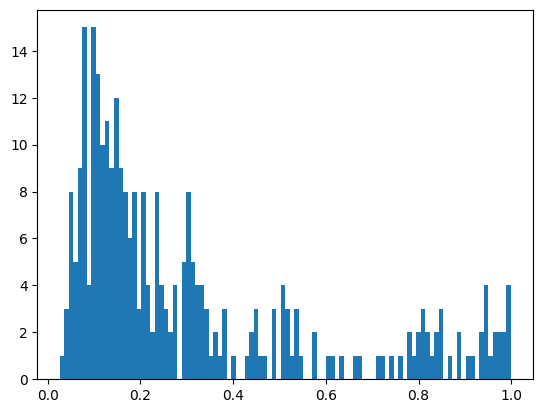

In [ ]:
# Max Logit
import matplotlib.pyplot as plt
plt.hist(max_logit[mask].max(dim=-1).values.cpu().numpy(), bins=100)

(array([ 1.,  4.,  4.,  3.,  1.,  9.,  9.,  8., 11.,  8.,  8.,  4., 11.,
         6., 12.,  4.,  7.,  3.,  3.,  3.,  3.,  7.,  2.,  2.,  5.,  4.,
         2.,  3.,  7.,  6.,  5.,  6.,  5.,  3.,  3.,  3.,  3.,  0.,  2.,
         0.,  1.,  5.,  5.,  3.,  2.,  5.,  0.,  5.,  1.,  4.,  3.,  4.,
         3.,  2.,  0.,  2.,  2.,  0.,  0.,  3.,  2.,  0.,  1.,  1.,  1.,
         1.,  2.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  3.,
         1.,  2.,  3.,  2.,  1.,  2.,  4.,  0.,  1.,  0.,  2.,  0.,  1.,
         1.,  0.,  2.,  4.,  1.,  2.,  2.,  2.,  4.]),
 array([0.02651063, 0.03623628, 0.04596194, 0.05568759, 0.06541324,
        0.0751389 , 0.08486455, 0.09459021, 0.10431586, 0.11404151,
        0.12376717, 0.13349283, 0.14321847, 0.15294413, 0.16266978,
        0.17239544, 0.18212108, 0.19184674, 0.2015724 , 0.21129805,
        0.22102371, 0.23074935, 0.24047501, 0.25020066, 0.25992632,
        0.26965198, 0.27937764, 0.28910327, 0.29882893, 0.30855459,
        0.31828025, 0.3280

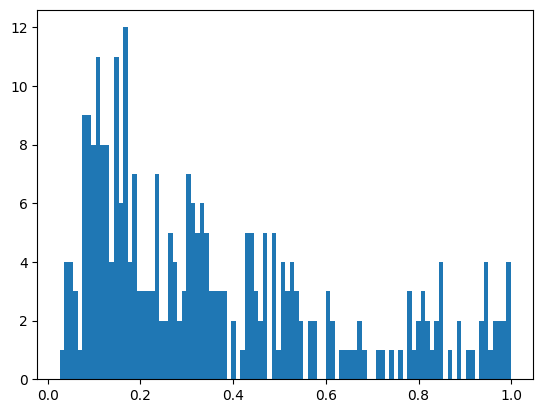

In [ ]:
# Raw Logits
plt.hist(F.softmax(shift_logits[mask], dim=-1).max(dim=-1).values.cpu().numpy(), bins=100)

In [ ]:
targets_set_to_one[mask]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0', dtype=torch.bfloat16)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 293.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([0.5       , 0.50999999, 0.51999998, 0.52999997, 0.54000002,
        0.55000001, 0.56      , 0.56999999, 0.57999998, 0.58999997,
        0.60000002, 0.61000001, 0.62      , 0.63      , 0.63999999,
        0.64999998, 0.66000003, 0.67000002, 0.68000001, 0.69      ,
        0.69999999, 0.70999998, 0.72000003, 0.

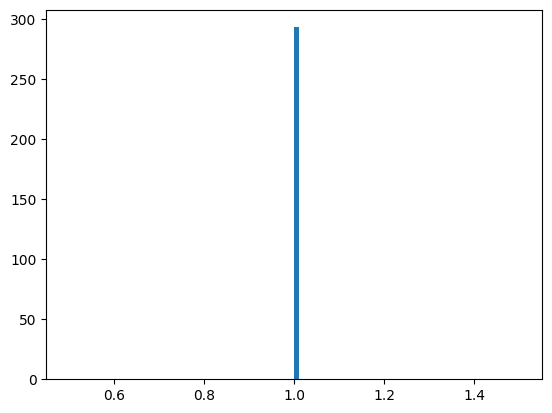

In [ ]:
# Targets Set to One
import matplotlib.pyplot as plt
plt.hist(targets_set_to_one[mask].to(torch.float32).max(dim=-1).values.cpu().numpy(), bins=100)

(array([210.,   3.,   1.,   0.,   2.,   0.,   2.,   2.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   2.,   1.,   2.,   2.,   0.,   1.,   0.,
          0.,   3.,   0.,   2.,   2.,   3.,   0.,   1.,   1.,   3.,   0.,
          0.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   2.,   0.,   2.,   2.,   2.,   1.,   1.,   1.,   0.,   3.,
          2.,   0.,   0.,   1.,   0.,   0.,   2.,   0.,   0.,   1.,   1.,
          0.,   1.,   1.,   2.,   3.,   0.,   1.,   1.,   2.,   1.,   2.,
          3.]),
 array([0.25      , 0.25499308, 0.25998613, 0.26497921, 0.26997229,
        0.27496535, 0.27995843, 0.28495148, 0.28994456, 0.29493764,
        0.29993069, 0.30492377, 0.30991685, 0.31490991, 0.31990299,
        0.32489607, 0.32988912, 0.3348822 , 0.33987528, 0.34486833,
        0.34986141, 0.35485446, 0.35984755, 0.

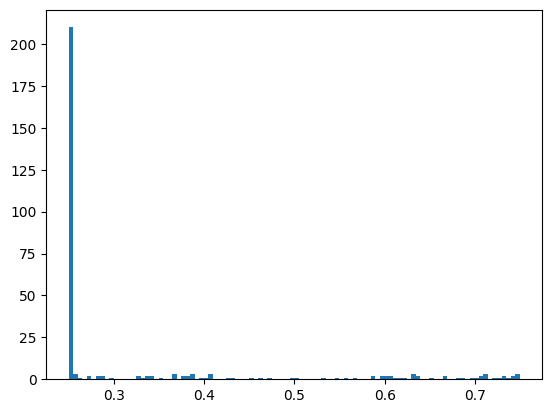

In [ ]:
plt.hist(add_k[mask].max(dim=-1).values.cpu().numpy(), bins=100)


In [ ]:
max_logit.max(dim=-1).values.cpu().numpy()

array([[0.        , 0.        , 0.        , ..., 0.8266956 , 0.34109816,
        0.24651651]], dtype=float32)

In [ ]:
max_logit[mask], max_logit[mask].max(dim=-1)

(tensor([[7.0217e-19, 3.0373e-20, 7.1601e-06,  ..., 3.0373e-20, 3.0611e-20,
          2.9785e-20],
         [1.1513e-01, 2.9848e-42, 1.1764e-18,  ..., 3.0913e-42, 2.9778e-42,
          2.9876e-42],
         [7.2114e-18, 2.9811e-19, 1.4255e-05,  ..., 2.9503e-19, 2.9319e-19,
          2.8625e-19],
         ...,
         [0.0000e+00, 0.0000e+00, 2.1820e-09,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [1.5814e-27, 2.5581e-30, 6.5230e-07,  ..., 2.6239e-30, 2.6993e-30,
          2.5308e-30],
         [4.1534e-27, 2.9558e-29, 1.0273e-04,  ..., 2.9328e-29, 2.9790e-29,
          2.8426e-29]], device='cuda:0'),
 torch.return_types.max(
 values=tensor([0.1962, 0.1151, 0.8189, 0.1284, 0.2320, 0.0984, 0.3110, 0.3630, 0.2323,
         0.0993, 0.1593, 0.1214, 0.4342, 0.4891, 0.8405, 0.2063, 0.9750, 0.2997,
         0.3021, 0.2094, 0.9919, 0.2346, 0.3046, 0.3602, 0.2723, 0.7423, 0.1911,
         0.7808, 0.2941, 0.4479, 0.1605, 0.8525, 0.2993, 0.1389, 0.4354, 0.1196,
         0.2123, 

In [ ]:
max_logit[~mask]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [ ]:
add_k[mask].max(dim=-1)

torch.return_types.max(
values=tensor([0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0

In [ ]:
targets_set_to_one[~mask], targets_set_to_one[~mask].shape, targets_set_to_one[~mask].max(dim=-1).values.sum()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0'),
 torch.Size([2330, 50304]),
 tensor(0., device='cuda:0'))

In [ ]:
targets_set_to_one[mask], targets_set_to_one[mask].shape, torch.max(targets_set_to_one[mask], dim=-1)

(tensor([[4.3707e-19, 1.8846e-20, 4.4405e-06,  ..., 1.8846e-20, 1.9058e-20,
          1.8529e-20],
         [5.0000e-01, 0.0000e+00, 6.6407e-19,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [1.9949e-17, 8.2332e-19, 3.9339e-05,  ..., 8.1315e-19, 8.0976e-19,
          7.8943e-19],
         ...,
         [0.0000e+00, 0.0000e+00, 6.2864e-09,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [1.1991e-27, 1.9352e-30, 4.9546e-07,  ..., 1.9968e-30, 2.0461e-30,
          1.9228e-30],
         [2.7515e-27, 1.9623e-29, 6.8188e-05,  ..., 1.9426e-29, 1.9722e-29,
          1.8834e-29]], device='cuda:0'),
 torch.Size([293, 50304]),
 torch.return_types.max(
 values=tensor([0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
         0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
         0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
         0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000

In [ ]:
add_k[~mask], add_k[~mask].shape, add_k[~mask].max(dim=-1).values.sum()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0'),
 torch.Size([2330, 50304]),
 tensor(0., device='cuda:0'))

In [ ]:
add_k[mask], add_k[mask].shape, torch.max(add_k[mask], dim=-1)

(tensor([[5.1500e-19, 2.2235e-20, 5.2452e-06,  ..., 2.2235e-20, 2.2446e-20,
          2.1811e-20],
         [4.1211e-01, 0.0000e+00, 7.8266e-19,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [2.3419e-17, 9.6901e-19, 4.6253e-05,  ..., 9.5545e-19, 9.4868e-19,
          9.2835e-19],
         ...,
         [0.0000e+00, 0.0000e+00, 7.3924e-09,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [1.4073e-27, 2.2680e-30, 5.8115e-07,  ..., 2.3419e-30, 2.4036e-30,
          2.2556e-30],
         [3.2564e-27, 2.3173e-29, 8.0585e-05,  ..., 2.2877e-29, 2.3271e-29,
          2.2187e-29]], device='cuda:0'),
 torch.Size([293, 50304]),
 torch.return_types.max(
 values=tensor([0.4121, 0.4121, 0.4824, 0.4102, 0.4102, 0.4121, 0.4121, 0.4102, 0.4121,
         0.4121, 0.4121, 0.4102, 0.4121, 0.4121, 0.4961, 0.4121, 0.5742, 0.4121,
         0.4102, 0.4121, 0.5820, 0.4102, 0.4102, 0.4121, 0.4121, 0.4375, 0.4102,
         0.4590, 0.4102, 0.4102, 0.4102, 0.5039, 0.4102, 0.4121, 0.4121

In [ ]:
valid_targets.squeeze()[mask.squeeze()].to(torch.int64) == torch.argmax(targets_smooth[mask], dim=-1)

NameError: name 'targets_smooth' is not defined

In [ ]:
targets_set_to_one.max(dim=-1).values

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.5000, 0.5000, 0.5000]],
       device='cuda:0')

In [ ]:
# all indices where mask is False
torch.where(~mask)

(tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:0'),
 tensor([   0,    1,    2,  ..., 2617, 2618, 2619], device='cuda:0'))

In [ ]:
mask


tensor([[False, False, False,  ...,  True,  True,  True]], device='cuda:0')

In [ ]:
targets_smooth[mask], targets_smooth[mask].shape, torch.argmax(targets_smooth[mask], dim=-1)

(tensor([[1.9819e-06, 1.9819e-06, 1.9819e-06,  ..., 1.9819e-06, 1.9819e-06,
          1.9819e-06],
         [8.9844e-01, 1.9819e-06, 1.9819e-06,  ..., 1.9819e-06, 1.9819e-06,
          1.9819e-06],
         [1.9819e-06, 1.9819e-06, 1.9819e-06,  ..., 1.9819e-06, 1.9819e-06,
          1.9819e-06],
         ...,
         [1.9819e-06, 1.9819e-06, 1.9819e-06,  ..., 1.9819e-06, 1.9819e-06,
          1.9819e-06],
         [1.9819e-06, 1.9819e-06, 1.9819e-06,  ..., 1.9819e-06, 1.9819e-06,
          1.9819e-06],
         [1.9819e-06, 1.9819e-06, 1.9819e-06,  ..., 1.9819e-06, 1.9819e-06,
          1.9819e-06]], device='cuda:0', dtype=torch.bfloat16),
 torch.Size([293, 50304]),
 tensor([ 2302,     0,  4374,     0,  2302,     0, 18812,     0,    19,     0,
         20083,     0,    56,  2886,  8905,     0,  4374,     0, 46708,     0,
          2809,  4580,     0,  2302,     0,  2302,     0,    56,  2886,  8905,
             0,    56,  2886,     0,  4374,     0, 17185,     0,  4125,  1568,
        

In [ ]:
valid_targets.squeeze()[mask.squeeze()].to(torch.int64) == torch.argmax(targets_smooth[mask], dim=-1)

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

In [ ]:
targets_smooth[~mask],targets_smooth[~mask].sum(), targets_smooth[~mask].shape

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0', dtype=torch.bfloat16),
 tensor(0., device='cuda:0', dtype=torch.bfloat16),
 torch.Size([2330, 50304]))

In [ ]:
dynamic_soft[mask], dynamic_soft[mask].sum(dim=-1).mean(), dynamic_soft[mask].shape

(tensor([[1.6917e-10, 3.7232e-12, 5.3575e-20,  ..., 3.6948e-12, 3.7232e-12,
          3.7232e-12],
         [8.9844e-01, 3.7852e-21, 8.9034e-07,  ..., 3.7852e-21, 3.8116e-21,
          3.7058e-21],
         [2.8799e-19, 5.9557e-22, 3.1598e-22,  ..., 5.7903e-22, 5.7903e-22,
          5.9557e-22],
         ...,
         [9.0226e-30, 1.9982e-33, 6.4947e-25,  ..., 1.9741e-33, 1.9982e-33,
          1.9861e-33],
         [0.0000e+00, 0.0000e+00, 1.2587e-09,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [2.3981e-28, 3.8827e-31, 9.9186e-08,  ..., 3.9751e-31, 4.0984e-31,
          3.8365e-31]], device='cuda:0', dtype=torch.bfloat16),
 tensor(1., device='cuda:0', dtype=torch.bfloat16),
 torch.Size([293, 50304]))

In [ ]:
dynamic_soft[~mask], dynamic_soft[~mask].shape

(tensor([[8.9844e-01, 0.0000e+00, 5.5294e-18,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [8.9844e-01, 0.0000e+00, 6.8173e-07,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [8.9844e-01, 0.0000e+00, 3.8184e-07,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         ...,
         [8.9844e-01, 1.5186e-29, 9.5926e-08,  ..., 1.4890e-29, 1.5284e-29,
          1.4298e-29],
         [8.9844e-01, 1.0710e-08, 2.4564e-08,  ..., 1.0536e-08, 1.0885e-08,
          1.0419e-08],
         [8.9844e-01, 0.0000e+00, 7.5670e-09,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00]], device='cuda:0', dtype=torch.bfloat16),
 torch.Size([2330, 50304]))

In [ ]:
torch.argmax(dynamic_soft[mask], dim=-1), torch.argmax(dynamic_soft[~mask], dim=-1)

(tensor([ 2302,     0,  4374,     0,  2302,     0, 18812,     0,    19,     0,
         20083,     0,    56,  2886,  8905,     0,  4374,     0, 46708,     0,
          2809,  4580,     0,  2302,     0,  2302,     0,    56,  2886,  8905,
             0,    56,  2886,     0,  4374,     0, 17185,     0,  4125,  1568,
             0, 16440,     0,  4374,     0,  2302,     0,    53,    87,     0,
          1328,  3548,   626,     0,    56,  2886,     0,    56,  2886,  9763,
             0,    56,  2886,     0,  2302,     0,    21,     0, 14316,  2316,
             0, 14316,  2316,     0,    56,  2886,   867,  4787,     0,  4374,
             0,    56,  2886,  8905,     0,  9030, 30131,     0,  2302,     0,
            19,     0, 47548,     0,    17,     0,  2302,     0,  4374,     0,
          2302,     0,  6623,  1887,     0,  2302,     0,    21,     0, 47548,
             0,    21,     0,    21,     0,  2302,     0,  4374,     0,  2302,
             0,  4374,     0,    21,     0,  9030, 3

In [ ]:
valid_targets.squeeze()[mask.squeeze()].to(torch.int64) == torch.argmax(dynamic_soft_masking_logits_corrected[mask], dim=-1)

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

In [ ]:
dynamic_soft_no_masking[~mask], dynamic_soft_no_masking[~mask].shape

(tensor([[8.9844e-01, 0.0000e+00, 5.5294e-18,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [8.9844e-01, 0.0000e+00, 6.8173e-07,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [8.9844e-01, 0.0000e+00, 3.8184e-07,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         ...,
         [8.9844e-01, 1.5186e-29, 9.5926e-08,  ..., 1.4890e-29, 1.5284e-29,
          1.4298e-29],
         [8.9844e-01, 1.0710e-08, 2.4564e-08,  ..., 1.0536e-08, 1.0885e-08,
          1.0419e-08],
         [8.9844e-01, 0.0000e+00, 7.5670e-09,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00]], device='cuda:0', dtype=torch.bfloat16),
 torch.Size([2330, 50304]))

In [ ]:
dynamic_soft_no_masking[mask], dynamic_soft_no_masking[mask].shape

(tensor([[1.9968e-06, 1.8044e-09, 9.7789e-08,  ..., 1.6080e-09, 1.6589e-09,
          1.4625e-09],
         [1.0000e+00, 3.2596e-09, 8.9779e-07,  ..., 2.9686e-09, 2.9540e-09,
          3.0705e-09],
         [2.3842e-06, 2.2847e-09, 2.9057e-07,  ..., 1.9209e-09, 2.0664e-09,
          1.9063e-09],
         ...,
         [3.9307e-02, 5.0757e-08, 1.2994e-05,  ..., 7.2177e-08, 5.1456e-08,
          7.2177e-08],
         [3.1738e-03, 1.2980e-08, 3.7432e-05,  ..., 1.3388e-08, 1.0128e-08,
          1.8859e-08],
         [1.5869e-02, 1.7462e-08, 1.0395e-04,  ..., 2.1770e-08, 1.6997e-08,
          2.1071e-08]], device='cuda:0', dtype=torch.bfloat16),
 torch.Size([293, 50304]))

In [ ]:
dynamic_soft_masking_logits[mask], dynamic_soft_masking_logits[mask].shape

(tensor([[1.9968e-06, 1.8044e-09, 9.7789e-08,  ..., 1.6080e-09, 1.6589e-09,
          1.4625e-09],
         [1.0000e+00, 3.2596e-09, 8.9779e-07,  ..., 2.9686e-09, 2.9540e-09,
          3.0705e-09],
         [2.3842e-06, 2.2847e-09, 2.9057e-07,  ..., 1.9209e-09, 2.0664e-09,
          1.9063e-09],
         ...,
         [3.9307e-02, 5.0757e-08, 1.2994e-05,  ..., 7.2177e-08, 5.1456e-08,
          7.2177e-08],
         [3.1738e-03, 1.2980e-08, 3.7432e-05,  ..., 1.3388e-08, 1.0128e-08,
          1.8859e-08],
         [1.5869e-02, 1.7462e-08, 1.0395e-04,  ..., 2.1770e-08, 1.6997e-08,
          2.1071e-08]], device='cuda:0', dtype=torch.bfloat16),
 torch.Size([293, 50304]))

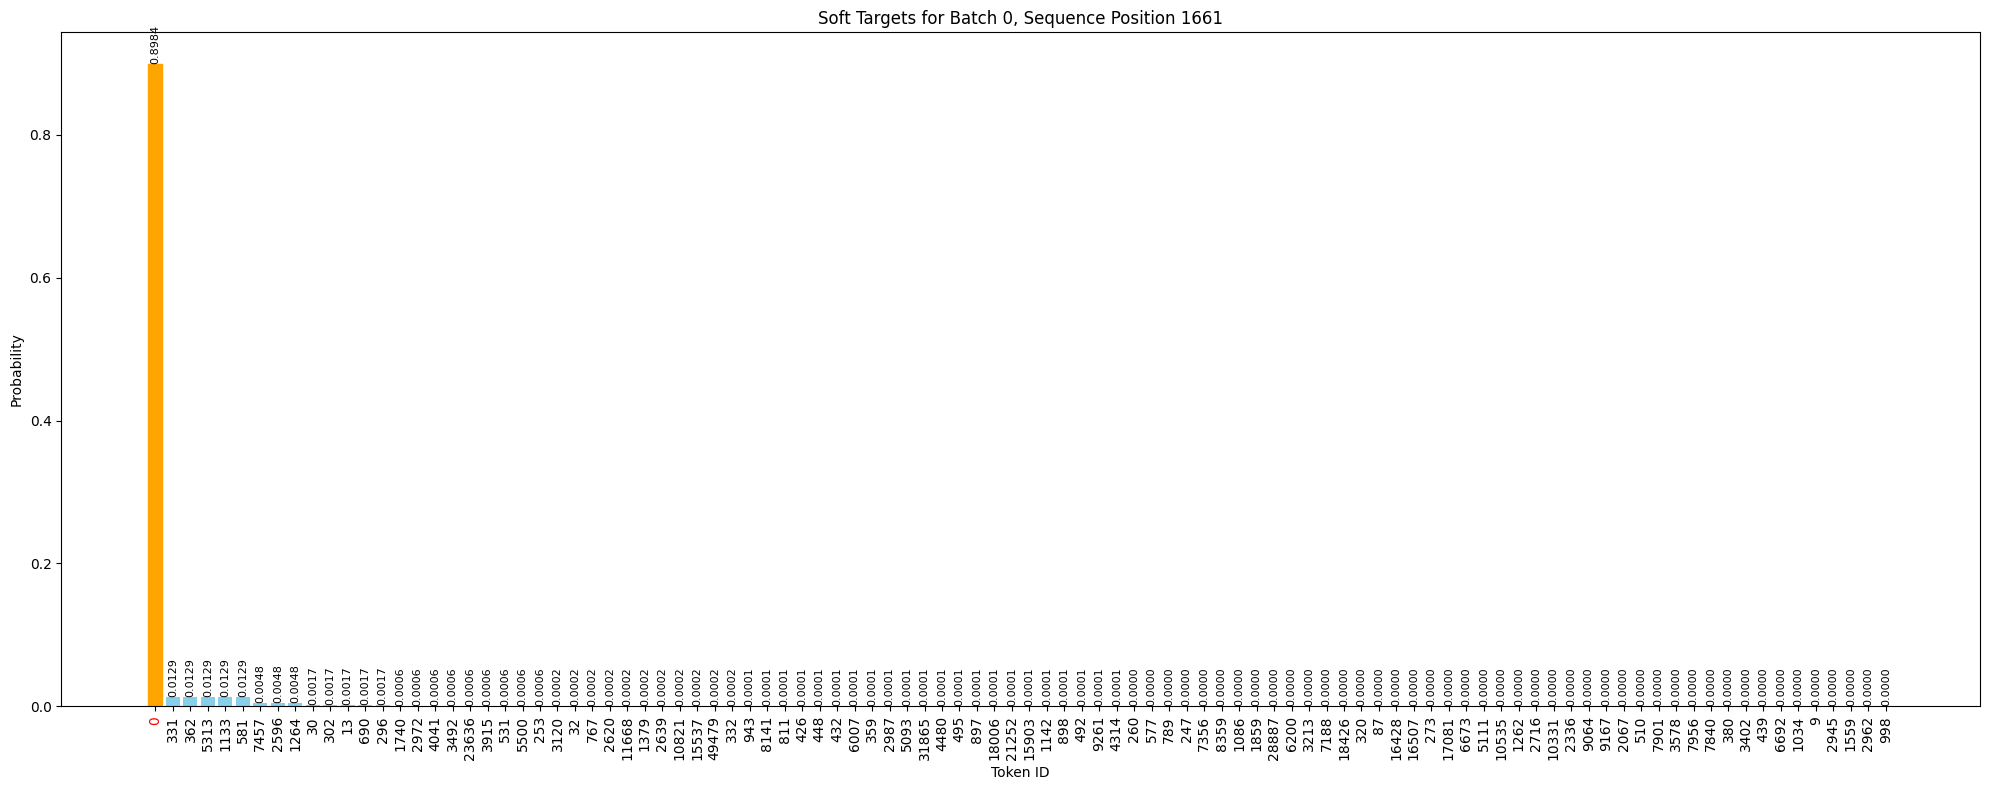

In [ ]:
shift_logits[~mask].to(torch.int64), shift_logits[~mask].shape
plot_soft_targets(dynamic_soft_masking_logits, fused_labels, 0, torch.where(mask)[1][150], top_k=100, logits_format=False)

In [ ]:
shift_logits[mask].to(torch.int64), shift_logits[mask].shape

(tensor([[  4,   0, -17,  ...,   0,   0,   0],
         [  2,   0,  32,  ...,   0,   0,   0],
         [  7,   0,   0,  ...,   0,   0,   0],
         ...,
         [  9,   0,  20,  ...,   0,   0,   0],
         [ 24,   0, 442,  ...,   0,   0,   0],
         [  6,   0,  53,  ...,   0,   0,   0]], device='cuda:0'),
 torch.Size([293, 50304]))

In [ ]:
dynamic_soft_masking_logits[~mask], dynamic_soft_masking_logits[~mask].shape

(tensor([[8.9844e-01, 3.1199e-08, 3.2663e-05,  ..., 3.1665e-08, 2.8405e-08,
          3.1199e-08],
         [9.0234e-01, 2.8522e-08, 6.6280e-05,  ..., 2.5961e-08, 3.3993e-08,
          2.7241e-08],
         [9.0234e-01, 3.0268e-08, 6.9141e-05,  ..., 2.9802e-08, 3.6554e-08,
          3.2829e-08],
         ...,
         [9.0234e-01, 2.4447e-08, 3.7193e-05,  ..., 2.9453e-08, 2.2235e-08,
          2.9453e-08],
         [9.0625e-01, 2.6310e-08, 9.2983e-05,  ..., 2.9802e-08, 2.6310e-08,
          3.2829e-08],
         [9.2578e-01, 1.4901e-08, 1.0371e-05,  ..., 1.7928e-08, 1.3562e-08,
          1.8510e-08]], device='cuda:0', dtype=torch.bfloat16),
 torch.Size([2330, 50304]))

In [ ]:
dynamic_soft_masking_logits_corrected.squeeze()[~mask.squeeze()], dynamic_soft_masking_logits_corrected.squeeze()[~mask.squeeze()].shape

(tensor([[8.9844e-01, 0.0000e+00, 6.8173e-07,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [8.9844e-01, 0.0000e+00, 3.8184e-07,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [8.9844e-01, 0.0000e+00, 8.1127e-10,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         ...,
         [8.9844e-01, 1.0710e-08, 2.4564e-08,  ..., 1.0536e-08, 1.0885e-08,
          1.0419e-08],
         [8.9844e-01, 0.0000e+00, 7.5670e-09,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [8.9844e-01, 1.9982e-33, 6.4947e-25,  ..., 1.9741e-33, 1.9982e-33,
          1.9861e-33]], device='cuda:0', dtype=torch.bfloat16),
 torch.Size([2330, 50304]))

In [ ]:
dynamic_soft_masking_logits_corrected = dynamic_soft_targets_mask_with_logits_corrected(output, fused_labels, alpha=0.500)
(valid_targets.squeeze()[mask.squeeze()].to(torch.int64) == torch.argmax(dynamic_soft_masking_logits_corrected[mask], dim=-1))

Soft targets shape: torch.Size([1, 2623, 50304]), Logits shape: torch.Size([1, 2623, 50304])
Loss: 187.64759826660156
dynamic_soft_targets.squeeze(): tensor([[5.0000e-01, 0.0000e+00, 3.3975e-06,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [5.0000e-01, 0.0000e+00, 1.9073e-06,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [5.0000e-01, 0.0000e+00, 4.0745e-09,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 6.2864e-09,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.1991e-27, 1.9352e-30, 4.9546e-07,  ..., 1.9968e-30, 2.0461e-30,
         1.9228e-30],
        [2.7515e-27, 1.9623e-29, 6.8188e-05,  ..., 1.9426e-29, 1.9722e-29,
         1.8834e-29]], device='cuda:0', dtype=torch.bfloat16), 
dynamic_soft_targets.squeeze().min(): 0.0, dynamic_soft_targets.squeeze().max(): 0.50390625


tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

In [ ]:
targets_set_to_one.squeeze(), targets_set_to_one.shape

(tensor([[5.0000e-01, 0.0000e+00, 3.3975e-06,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [5.0000e-01, 0.0000e+00, 1.9073e-06,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [5.0000e-01, 0.0000e+00, 4.0745e-09,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         ...,
         [0.0000e+00, 0.0000e+00, 6.2864e-09,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [1.1991e-27, 1.9352e-30, 4.9546e-07,  ..., 1.9968e-30, 2.0461e-30,
          1.9228e-30],
         [2.7515e-27, 1.9623e-29, 6.8188e-05,  ..., 1.9426e-29, 1.9722e-29,
          1.8834e-29]], device='cuda:0'),
 torch.Size([1, 2623, 50304]))

In [ ]:
targets_set_to_one[mask], targets_set_to_one[mask].shape

(tensor([[5.0000e-01, 0.0000e+00, 3.3975e-06,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [5.0000e-01, 0.0000e+00, 1.9073e-06,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [5.0000e-01, 0.0000e+00, 4.0745e-09,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         ...,
         [0.0000e+00, 0.0000e+00, 6.2864e-09,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [1.1991e-27, 1.9352e-30, 4.9546e-07,  ..., 1.9968e-30, 2.0461e-30,
          1.9228e-30],
         [2.7515e-27, 1.9623e-29, 6.8188e-05,  ..., 1.9426e-29, 1.9722e-29,
          1.8834e-29]], device='cuda:0'),
 torch.Size([2623, 50304]))

In [ ]:
targets_set_to_one[~mask], targets_set_to_one[~mask].shape

(tensor([], device='cuda:0', size=(0, 50304)), torch.Size([0, 50304]))

In [ ]:
add_k[~mask], add_k[~mask].shape

(tensor([], device='cuda:0', size=(0, 50304)), torch.Size([0, 50304]))

In [ ]:
add_k[mask], add_k[mask].shape

(tensor([[9.0820e-02, 0.0000e+00, 6.1691e-06,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [9.0820e-02, 0.0000e+00, 3.4571e-06,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [9.0820e-02, 0.0000e+00, 7.3924e-09,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         ...,
         [0.0000e+00, 0.0000e+00, 1.1409e-08,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [2.1709e-27, 3.5252e-30, 8.9779e-07,  ..., 3.6238e-30, 3.7224e-30,
          3.5006e-30],
         [4.9982e-27, 3.5696e-29, 1.2398e-04,  ..., 3.5302e-29, 3.5893e-29,
          3.4118e-29]], device='cuda:0'),
 torch.Size([2623, 50304]))

In [ ]:
add_k.squeeze(), add_k.shape

(tensor([[9.0820e-02, 0.0000e+00, 6.1691e-06,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [9.0820e-02, 0.0000e+00, 3.4571e-06,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [9.0820e-02, 0.0000e+00, 7.3924e-09,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         ...,
         [0.0000e+00, 0.0000e+00, 1.1409e-08,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [2.1709e-27, 3.5252e-30, 8.9779e-07,  ..., 3.6238e-30, 3.7224e-30,
          3.5006e-30],
         [4.9982e-27, 3.5696e-29, 1.2398e-04,  ..., 3.5302e-29, 3.5893e-29,
          3.4118e-29]], device='cuda:0'),
 torch.Size([1, 2623, 50304]))

In [ ]:
targets_smooth

In [ ]:
dynamic_soft_no_masking[mask].sum(dim=-1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

In [ ]:
dynamic_soft_no_masking[~mask].sum(dim=-1)

tensor([1., 1., 1.,  ..., 1., 1., 1.], device='cuda:0', dtype=torch.bfloat16)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Assume output.logits and fused_labels are provided
# Shift logits and labels
shift_logits = output.logits[:, :-1, :].contiguous()
valid_targets = fused_labels[:, 1:].contiguous()

num_classes = shift_logits.size(-1)

# Create mask for valid targets
mask = (valid_targets != -100)

# Initialize target distributions with (1 - alpha) / (num_classes - 1)
soft_alpha = 0.1
targets_smooth = torch.full_like(shift_logits, (1.0 - soft_alpha) / (num_classes - 1))

# Assign alpha to the correct classes where label is valid
valid_indices = valid_targets[mask].unsqueeze(1)
targets_smooth[mask] = targets_smooth[mask].scatter(1, valid_indices, soft_alpha)

# For positions to be ignored, set the entire distribution to 0
targets_smooth[~mask] = 0.0

# Define the loss function
loss_fct = nn.KLDivLoss(reduction='batchmean')

# Compute log probabilities from logits
log_probs = F.log_softmax(shift_logits, dim=-1)

# Flatten the tensors for loss computation
loss = loss_fct(
    log_probs.view(-1, num_classes),
    targets_smooth.view(-1, num_classes)
)

/localdisk/ssrivas9/miniconda3/envs/eval/lib/python3.10/site-packages/torch/nn/functional.py:2976: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn(


In [ ]:
print(f"Logits shape: {shift_logits.shape}, Targets shape: {targets_smooth.shape}")

Logits shape: torch.Size([1, 2623, 50304]), Targets shape: torch.Size([1, 2623, 50304])


In [ ]:
print(f" Loss: {loss.item()}")

 Loss: 9.417533874511719e-06


In [ ]:
shift_logits = output.logits[:, :-1, :].contiguous()  # [batch, seq-1, num_classes]
valid_targets = fused_labels[:, 1:].contiguous()      # [batch, seq-1]

num_classes = shift_logits.size(-1)  # Vocab size

# Create mask for valid targets (labels != -100)
mask = (valid_targets != -100)  # [batch, seq-1]

### Soft Targets = Interpolation with Logits. Masked ignored, only valid are smoothed. 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

dtype = torch.float32
shift_logits = output.logits[:, :-1, :].contiguous().to(dtype)
valid_targets = fused_labels[:, 1:].contiguous().to(dtype)

num_classes = shift_logits.size(-1)
mask = (valid_targets != -100)
soft_probs = F.softmax(shift_logits, dim=-1).to(dtype)
batch_size, shifted_seq_length = shift_logits.size()[:2]
# Step 1: Initialize a zero tensor for one-hot encoding
one_hot_targets = torch.zeros(
    batch_size, 
    shifted_seq_length, 
    num_classes, 
    device=valid_targets.device, 
    dtype=dtype
)  # Shape: [batch_size, seq_length-1, num_classes]

# Step 2: Identify valid target positions
# The mask has shape [batch_size, seq_length-1]
valid_positions = mask.nonzero(as_tuple=False)  # Tensor of shape [num_valid_positions, 2]
target_indices = valid_targets[mask]  # Tensor of shape [num_valid_positions]
target_indices = target_indices.to(torch.long)  # Ensure correct dtype
one_hot_valid = F.one_hot(target_indices, num_classes=num_classes).to(dtype)

batch_indices, seq_indices = valid_positions[:, 0], valid_positions[:, 1]  # Shapes: [num_valid_positions], [num_valid_positions]
# Assign one-hot vectors to the corresponding positions
one_hot_targets[batch_indices, seq_indices] = one_hot_valid  # Broadcasting assignment
# Cast one_hot_targets to the same dtype as soft_probs
one_hot_targets = one_hot_targets.to(dtype)
soft_probs = soft_probs.to(dtype)

assert one_hot_targets.shape == (batch_size, shifted_seq_length, num_classes), \
    f"Expected shape {[batch_size, shifted_seq_length, num_classes]}, but got {one_hot_targets.shape}"
assert torch.all(one_hot_targets[~mask] == 0), "Positions with label -100 are not all zeros."
valid_one_hot_sum = one_hot_targets[mask].sum(dim=-1)
assert torch.all(valid_one_hot_sum == 1), "Valid positions do not have exactly one '1' in their one-hot vectors."
# soft_probs.sum(dim=-1), one_hot_targets.sum(dim=-1)
alpha = torch.tensor(0.1, device=one_hot_targets.device, dtype=dtype)
# Step 1: Interpolate soft_probs and one_hot_targets
dynamic_soft_targets = alpha * soft_probs + (torch.tensor(1.0, device=one_hot_targets.device, dtype=dtype) - alpha) * one_hot_targets  # Shape: [batch_size, seq_length-1, num_classes]
# Step 2: Handle positions to be ignored by setting their target distributions to zero
dynamic_soft_targets = dynamic_soft_targets * mask.unsqueeze(-1).float()  # Broadcasting mask
# dynamic_soft_targets[~mask] = 0.0
# Cast back to the original dtype
dynamic_soft_targets = dynamic_soft_targets.to(torch.bfloat16)
# Verify that dynamic_soft_targets has the correct shape
assert dynamic_soft_targets.shape == (batch_size, shifted_seq_length, num_classes), \
    f"Expected shape {[batch_size, shifted_seq_length, num_classes]}, but got {dynamic_soft_targets.shape}"
# Verify that positions with -100 have all zeros
assert torch.all(dynamic_soft_targets[~mask] == 0), "Positions with label -100 are not all zeros in dynamic_soft_targets."


In [ ]:

# Verify that valid positions have probability distributions summing to 1
valid_dynamic_sum = dynamic_soft_targets[mask].sum(dim=-1)
assert torch.allclose(valid_dynamic_sum, torch.ones_like(valid_dynamic_sum), atol=1e-2), \
    "Valid positions in dynamic_soft_targets do not sum to 1."

# Now, dynamic_soft_targets can be used as needed in your loss computations or other operations
# Example: Using KLDivLoss with dynamic_soft_targets
# Ensure that shift_logits is used to compute log_probs as required by KLDivLoss

# Compute log probabilities from shift_logits
log_probs = F.log_softmax(shift_logits, dim=-1)  # Shape: [batch_size, seq_length-1, num_classes]

# Define the loss function
loss_fct = nn.KLDivLoss(reduction='batchmean')

# Compute the loss
loss = loss_fct(
    log_probs.view(-1, num_classes),         # [batch_size * (seq_length-1), num_classes]
    dynamic_soft_targets.view(-1, num_classes)   # [batch_size * (seq_length-1), num_classes]
)

print(f"Loss: {loss.item()}")

# Backpropagate if in training mode
loss.backward()

Loss: 3.977926731109619


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Ensure reproducibility and set device
torch.manual_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Example shapes (adjust as per your actual data)
# output.logits: [batch_size, seq_length, num_classes]
# fused_labels: [batch_size, seq_length]

# Move tensors to the appropriate device and dtype
dtype = torch.float32
shift_logits = output.logits[:, :-1, :].contiguous().to(dtype).to(device)  # Shape: [batch_size, seq_length-1, num_classes]
valid_targets = fused_labels[:, 1:].contiguous().to(dtype).to(device)     # Shape: [batch_size, seq_length-1]

num_classes = shift_logits.size(-1)
mask = (valid_targets != -100)  # Ignored positions are marked with -100

# Compute soft probabilities from logits and detach to prevent gradient flow
soft_probs = F.softmax(shift_logits, dim=-1).to(dtype).detach()  # Shape: [batch_size, seq_length-1, num_classes]

batch_size, shifted_seq_length = shift_logits.size()[:2]

# Initialize a zero tensor for one-hot encoding
one_hot_targets = torch.zeros(
    batch_size, 
    shifted_seq_length, 
    num_classes, 
    device=valid_targets.device, 
    dtype=dtype
)  # Shape: [batch_size, seq_length-1, num_classes]

# Identify valid target positions
valid_positions = mask.nonzero(as_tuple=False)  # Shape: [num_valid_positions, 2]
target_indices = valid_targets[mask].long()    # Shape: [num_valid_positions]

# Convert target indices to one-hot vectors
one_hot_valid = F.one_hot(target_indices, num_classes=num_classes).to(dtype)  # Shape: [num_valid_positions, num_classes]

# Assign one-hot vectors to their corresponding positions in the batch
batch_indices, seq_indices = valid_positions[:, 0], valid_positions[:, 1]  # Shapes: [num_valid_positions], [num_valid_positions]
one_hot_targets[batch_indices, seq_indices] = one_hot_valid  # Broadcasting assignment

# Define the interpolation factor
alpha = 0.1

# Compute dynamic soft targets without tracking gradients
with torch.no_grad():
    # Interpolate between soft_probs and one_hot_targets
    dynamic_soft_targets = alpha * soft_probs + (1.0 - alpha) * one_hot_targets  # Shape: [batch_size, seq_length-1, num_classes]
    
    # Apply mask to ignore certain positions
    dynamic_soft_targets = dynamic_soft_targets * mask.unsqueeze(-1).float()  # Shape: [batch_size, seq_length-1, num_classes]
    
    # Optionally cast to a different dtype if required (ensure compatibility with loss function)
    dynamic_soft_targets = dynamic_soft_targets.to(torch.bfloat16)

# Verify shapes and properties
assert dynamic_soft_targets.shape == (batch_size, shifted_seq_length, num_classes), \
    f"Expected shape {[batch_size, shifted_seq_length, num_classes]}, but got {dynamic_soft_targets.shape}"
assert torch.all(dynamic_soft_targets[~mask] == 0), "Positions with label -100 are not all zeros in dynamic_soft_targets."

# Verify that valid positions have probability distributions summing to 1
valid_dynamic_sum = dynamic_soft_targets[mask].sum(dim=-1)
assert torch.allclose(valid_dynamic_sum, torch.ones_like(valid_dynamic_sum), atol=1e-2), \
    "Valid positions in dynamic_soft_targets do not sum to 1."

# Compute log probabilities from shift_logits for KLDivLoss
log_probs = F.log_softmax(shift_logits, dim=-1)  # Shape: [batch_size, seq_length-1, num_classes]

# Define the loss function
loss_fct = nn.KLDivLoss(reduction='batchmean')#(reduction='batchmean')

# Compute the loss
# Reshape tensors to [batch_size * (seq_length-1), num_classes]
loss = loss_fct(
    log_probs.view(-1, num_classes),                # Predictions
    dynamic_soft_targets.view(-1, num_classes)       # Targets
)
print(f"Soft targets shape: {dynamic_soft_targets.shape}, Logits shape: {log_probs.shape}")
print(f"Loss: {loss.item()}")

# Backpropagate the loss
loss.backward()

Soft targets shape: torch.Size([1, 2623, 50304]), Logits shape: torch.Size([1, 2623, 50304])
Loss: 0.15558448433876038


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Assuming `output.logits` and `fused_labels` are provided by your model and data loader respectively.
# For example:
# output = model(input_ids)
# fused_labels = ...  # Your label tensor

# Ensure reproducibility and set device
torch.manual_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Example shapes (adjust as per your actual data)
# output.logits: [batch_size, seq_length, num_classes]
# fused_labels: [batch_size, seq_length]

# Move tensors to the appropriate device and dtype
dtype = torch.float32

# Ensure that output.logits requires grad
shift_logits = output.logits[:, :-1, :].contiguous().to(dtype).to(device)
assert shift_logits.requires_grad, "shift_logits must require gradients."

valid_targets = fused_labels[:, 1:].contiguous().to(torch.long).to(device)  # Ensure targets are LongTensor

num_classes = shift_logits.size(-1)
mask = (valid_targets != -100)  # Ignored positions are marked with -100

# Compute soft probabilities from logits and detach to prevent gradient flow
soft_probs = F.softmax(shift_logits, dim=-1).detach()  # Shape: [batch_size, seq_length-1, num_classes]

batch_size, shifted_seq_length = shift_logits.size()[:2]

# Initialize a zero tensor for one-hot encoding
one_hot_targets = torch.zeros(
    batch_size, 
    shifted_seq_length, 
    num_classes, 
    device=valid_targets.device, 
    dtype=dtype
)  # Shape: [batch_size, seq_length-1, num_classes]

# Identify valid target positions
valid_positions = mask.nonzero(as_tuple=False)  # Shape: [num_valid_positions, 2]
target_indices = valid_targets[mask]    # Shape: [num_valid_positions]

# Convert target indices to one-hot vectors
one_hot_valid = F.one_hot(target_indices, num_classes=num_classes).to(dtype)  # Shape: [num_valid_positions, num_classes]

# Assign one-hot vectors to their corresponding positions in the batch
batch_indices, seq_indices = valid_positions[:, 0], valid_positions[:, 1]  # Shapes: [num_valid_positions], [num_valid_positions]
one_hot_targets[batch_indices, seq_indices] = one_hot_valid  # Broadcasting assignment

# Define the interpolation factor
alpha = 0.1

# Compute dynamic soft targets without tracking gradients
with torch.no_grad():
    # Interpolate between soft_probs and one_hot_targets
    dynamic_soft_targets = alpha * soft_probs + (1.0 - alpha) * one_hot_targets  # Shape: [batch_size, seq_length-1, num_classes]
    
    # Apply mask to ignore certain positions
    dynamic_soft_targets = dynamic_soft_targets * mask.unsqueeze(-1).float()  # Shape: [batch_size, seq_length-1, num_classes]
    
    # Optionally cast to a different dtype if required (ensure compatibility with loss function)
    dynamic_soft_targets = dynamic_soft_targets.to(torch.bfloat16)

# Verify shapes and properties
assert dynamic_soft_targets.shape == (batch_size, shifted_seq_length, num_classes), \
    f"Expected shape {[batch_size, shifted_seq_length, num_classes]}, but got {dynamic_soft_targets.shape}"
assert torch.all(dynamic_soft_targets[~mask] == 0), "Positions with label -100 are not all zeros in dynamic_soft_targets."

# Verify that valid positions have probability distributions summing to 1
valid_dynamic_sum = dynamic_soft_targets[mask].sum(dim=-1)
assert torch.allclose(valid_dynamic_sum, torch.ones_like(valid_dynamic_sum), atol=1e-2), \
    "Valid positions in dynamic_soft_targets do not sum to 1."

# Compute log probabilities from shift_logits for KLDivLoss
log_probs = F.log_softmax(shift_logits, dim=-1)  # Shape: [batch_size, seq_length-1, num_classes]
assert log_probs.requires_grad, "log_probs must require gradients."

# Define the loss function
loss_fct = nn.KLDivLoss(reduction='batchmean')

# Compute the loss
# Reshape tensors to [batch_size * (seq_length-1), num_classes]
loss = loss_fct(
    log_probs.view(-1, num_classes),                # Predictions
    dynamic_soft_targets.view(-1, num_classes)       # Targets
)

print(f"Loss: {loss.item()}")

# Backpropagate the loss
loss.backward()

AssertionError: shift_logits must require gradients.

In [ ]:

# Create one-hot encoded labels
one_hot = torch.zeros_like(shift_logits).scatter(2, valid_targets.unsqueeze(-1), 1.0)

# Compute the target distribution
soft_alpha = 0.1
targets_combined = soft_alpha * soft_probs + (1.0 - soft_alpha) * one_hot

# For positions to be ignored, set the entire distribution to 0
targets_combined[~mask] = 0.0

# Define the loss function
loss_fct = nn.KLDivLoss(reduction='batchmean')

# Compute log probabilities from logits
log_probs = F.log_softmax(shift_logits, dim=-1)

# Flatten the tensors for loss computation
loss = loss_fct(
    log_probs.view(-1, num_classes),
    targets_combined.view(-1, num_classes)
)

### Debugging 

In [ ]:
import torch
import torch.nn.functional as F

def create_one_hot_targets(valid_targets: torch.Tensor, mask: torch.Tensor, num_classes: int) -> torch.Tensor:
    """
    Converts label indices to one-hot encoded vectors, handling invalid positions.

    Args:
        valid_targets (torch.Tensor): Tensor of shape [batch_size, shifted_seq_length] containing label indices.
        mask (torch.Tensor): Boolean tensor of shape [batch_size, shifted_seq_length] indicating valid labels.
        num_classes (int): Number of classes for one-hot encoding.

    Returns:
        torch.Tensor: One-hot encoded tensor of shape [batch_size, shifted_seq_length, num_classes].
    """
    batch_size, shifted_seq_length = valid_targets.shape

    # Initialize one_hot_targets with zeros
    one_hot_targets = torch.zeros(
        batch_size, 
        shifted_seq_length, 
        num_classes, 
        device=valid_targets.device, 
        dtype=torch.float32  # Use torch.float32 for precision
    )

    # Extract valid (batch, seq) indices
    batch_indices, seq_indices = mask.nonzero(as_tuple=True)

    # Extract corresponding target class indices
    target_classes = valid_targets[batch_indices, seq_indices].long()

    # Assign 1.0 to the target class indices at the valid positions
    one_hot_targets[batch_indices, seq_indices, target_classes] = 1.0

    return one_hot_targets

# Shift logits and labels
shift_logits = output.logits[:, :-1, :].contiguous()  # Shape: [batch_size, shifted_seq_length, num_classes]
valid_targets = fused_labels[:, 1:].contiguous()      # Shape: [batch_size, shifted_seq_length]

# Create mask for valid targets (labels != -100)
mask = (valid_targets != -100)  # Shape: [batch_size, shifted_seq_length]

# Verify that each position has at most one label
valid_label_counts = mask.sum(dim=-1)  # Shape: [batch_size]
if (valid_label_counts > 1).any():
    raise ValueError("Some positions have multiple valid labels. Please ensure that each position has only one label.")

# Create one-hot encoded targets
one_hot_targets = create_one_hot_targets(valid_targets, mask, num_classes)  # Shape: [batch_size, shifted_seq_length, num_classes]

# Verify the one-hot encoding
sum_per_position = one_hot_targets.sum(dim=-1)  # Shape: [batch_size, shifted_seq_length]
mean_sum = sum_per_position.mean().item()
print(f"Mean sum per position: {mean_sum}")  # Should be approximately 1.0

assert torch.allclose(sum_per_position[mask], torch.ones_like(sum_per_position[mask]), atol=1e-5), \
    "One-hot encoding error: Some valid positions do not sum to 1."

assert torch.all(sum_per_position[~mask] == 0), \
    "One-hot encoding error: Some invalid positions are not zero."

print("One-hot encoding verification passed.")

# ============================
# Interpolate Logits and One-Hot Targets with Alpha to Create Dynamic Soft Targets
# ============================

# Define the interpolation parameter alpha
alpha = 0.1  # Example value; adjust based on your requirements

# Compute softmax probabilities from logits
soft_probs = F.softmax(shift_logits, dim=-1)  # Shape: [batch_size, shifted_seq_length, num_classes]

# Interpolate to create dynamic soft targets
dynamic_soft_targets = alpha * soft_probs + (1.0 - alpha) * one_hot_targets  # Shape: [batch_size, shifted_seq_length, num_classes]

# Zero out the invalid positions
dynamic_soft_targets = dynamic_soft_targets * mask.unsqueeze(-1).float()  # Shape: [batch_size, shifted_seq_length, num_classes]

# Verification
sum_dynamic = dynamic_soft_targets.sum(dim=-1)  # Shape: [batch_size, shifted_seq_length]
mean_sum_dynamic = sum_dynamic.mean().item()
print(f"Mean sum of dynamic soft targets per position: {mean_sum_dynamic}")  # Should be approximately 1.0

assert torch.allclose(sum_dynamic[mask], torch.ones_like(sum_dynamic[mask]), atol=1e-5), \
    "Dynamic soft targets error: Some valid positions do not sum to 1."

assert torch.all(sum_dynamic[~mask] == 0), \
    "Dynamic soft targets error: Some invalid positions are not zero."

print("Dynamic soft targets verification passed.")

# ============================
# Example Loss Computation Using KLDivLoss
# ============================

# Compute log probabilities from shift_logits
log_probs = F.log_softmax(shift_logits, dim=-1)  # Shape: [batch_size, shifted_seq_length, num_classes]

# Define the loss function
loss_fct = nn.KLDivLoss(reduction='batchmean')

# Compute the loss
loss = loss_fct(
    log_probs.view(-1, num_classes),         # [batch_size * shifted_seq_length, num_classes]
    dynamic_soft_targets.view(-1, num_classes)   # [batch_size * shifted_seq_length, num_classes]
)

print(f"Loss: {loss.item()}")

# Backpropagate if in training mode
# loss.backward()

ValueError: Some positions have multiple valid labels. Please ensure that each position has only one label.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Assume output.logits and fused_labels are provided
# Shift logits and labels
shift_logits = output.logits[:, :-1, :].contiguous()
valid_targets = fused_labels[:, 1:].contiguous()

num_classes = shift_logits.size(-1)

# Create mask for valid targets
mask = (valid_targets != -100)

# Compute softmax probabilities from logits
soft_probs = F.softmax(shift_logits, dim=-1)

# Create one-hot encoded labels
one_hot = torch.zeros_like(shift_logits).scatter(2, valid_targets.unsqueeze(-1), 1.0)

# Compute the target distribution
soft_alpha = 0.1
targets_combined = soft_alpha * soft_probs + (1.0 - soft_alpha) * one_hot

# For positions to be ignored, set the entire distribution to 0
targets_combined[~mask] = 0.0

# Define the loss function
loss_fct = nn.KLDivLoss(reduction='batchmean')

# Compute log probabilities from logits
log_probs = F.log_softmax(shift_logits, dim=-1)

# Flatten the tensors for loss computation
loss = loss_fct(
    log_probs.view(-1, num_classes),
    targets_combined.view(-1, num_classes)
)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

soft_alpha = 0.1 

if soft_alpha is not None:
    # Shift logits and labels
    shift_logits = output.logits[:, :-1, :].contiguous()  # [batch, seq-1, num_classes]
    valid_targets = fused_labels[:, 1:].contiguous()      # [batch, seq-1]

    num_classes = shift_logits.size(-1)  # Vocab size

    # Create mask for valid targets (labels != -100)
    mask = (valid_targets != -100)  # [batch, seq-1]

    # Replace invalid labels with -100 to ignore them
    valid_targets = torch.where(
        (valid_targets >= 0) & (valid_targets < num_classes),
        valid_targets,
        torch.tensor(-100, device=valid_targets.device)
    )

    # Update mask after replacing invalid labels
    mask = (valid_targets != -100)

    # Diagnostic: Check label ranges
    if mask.any():
        min_label = valid_targets[mask].min().item()
        max_label = valid_targets[mask].max().item()
        print(f"Valid Targets Range: {min_label} to {max_label}")
        if min_label < 0 or max_label >= num_classes:
            raise ValueError(f"Labels out of bounds. Valid labels should be in [0, {num_classes - 1}], but got min {min_label} and max {max_label}.")

    # Compute softmax probabilities from logits
    soft_probs = F.softmax(shift_logits, dim=-1)  # [batch, seq-1, num_classes]

    # Create one-hot encoded labels
    one_hot = torch.zeros_like(shift_logits).scatter_(2, valid_targets.unsqueeze(-1), 1.0)  # [batch, seq-1, num_classes]

    # Compute the target distribution
    targets_combined = soft_alpha * soft_probs + (1.0 - soft_alpha) * one_hot  # [batch, seq-1, num_classes]

    # For positions to be ignored, set the entire distribution to 0
    targets_combined = targets_combined * mask.unsqueeze(-1).float()

    # Verify that target distributions sum to 1 where mask is True
    target_sums = targets_combined.sum(dim=-1)
    print(f"Target sums (should be close to 1 for valid positions): {target_sums[mask]}")

    # Define the loss function
    loss_fct = nn.KLDivLoss(reduction='batchmean')

    # Compute log probabilities from logits
    log_probs = F.log_softmax(shift_logits, dim=-1)  # [batch, seq-1, num_classes]

    # Flatten the tensors for loss computation
    loss = loss_fct(
        log_probs.view(-1, num_classes),         # [batch * (seq-1), num_classes]
        targets_combined.view(-1, num_classes)   # [batch * (seq-1), num_classes]
    )

    print(f"Loss: {loss.item()}")
    loss.backward()  # Backpropagate if needed

Valid Targets Range: 0 to 49579


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


../aten/src/ATen/native/cuda/ScatterGatherKernel.cu:365: operator(): block: [5,0,0], thread: [32,0,0] Assertion `idx_dim >= 0 && idx_dim < index_size && "index out of bounds"` failed.
../aten/src/ATen/native/cuda/ScatterGatherKernel.cu:365: operator(): block: [5,0,0], thread: [33,0,0] Assertion `idx_dim >= 0 && idx_dim < index_size && "index out of bounds"` failed.
../aten/src/ATen/native/cuda/ScatterGatherKernel.cu:365: operator(): block: [5,0,0], thread: [34,0,0] Assertion `idx_dim >= 0 && idx_dim < index_size && "index out of bounds"` failed.
../aten/src/ATen/native/cuda/ScatterGatherKernel.cu:365: operator(): block: [5,0,0], thread: [35,0,0] Assertion `idx_dim >= 0 && idx_dim < index_size && "index out of bounds"` failed.
../aten/src/ATen/native/cuda/ScatterGatherKernel.cu:365: operator(): block: [5,0,0], thread: [36,0,0] Assertion `idx_dim >= 0 && idx_dim < index_size && "index out of bounds"` failed.
../aten/src/ATen/native/cuda/ScatterGatherKernel.cu:365: operator(): block: [5,0

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os

# Enable synchronous CUDA error reporting for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Sample Data (for illustration purposes)
batch_size = 2
seq_length = 5
num_classes = 6  # Adjusted to accommodate labels up to 5

# Dummy logits and labels
torch.manual_seed(0)
output = type('obj', (object,), {})()  # Creating a dummy object
output.logits = torch.randn(batch_size, seq_length, num_classes, requires_grad=True).to("cuda")
fused_labels = torch.tensor([
    [1, 2, -100, 4, 5],
    [2, -100, 3, 4, 0]
]).to("cuda")  # Move labels to CUDA

# Correct the labels if necessary
fused_labels = fused_labels.clone()
invalid_mask = (fused_labels >= num_classes) | (fused_labels < 0)
num_invalid = invalid_mask.sum().item()
print(f"Number of Invalid Labels: {num_invalid}")

if num_invalid > 0:
    fused_labels[invalid_mask] = -100  # Optionally, map to a valid class
    print("Invalid labels set to -100.")

soft_alpha = 0.1  # Example alpha value

if soft_alpha is not None:
    # Shift logits and labels
    shift_logits = output.logits[:, :-1, :].contiguous()  # [batch, seq-1, num_classes]
    valid_targets = fused_labels[:, 1:].contiguous()      # [batch, seq-1]

    num_classes = shift_logits.size(-1)  # Vocab size
    print(f"Number of Classes (Vocabulary Size): {num_classes}")

    # Create mask for valid targets (labels != -100)
    mask = (valid_targets != -100)  # [batch, seq-1]

    # Diagnostic: Check label ranges
    if mask.any():
        min_label = valid_targets[mask].min().item()
        max_label = valid_targets[mask].max().item()
        print(f"Valid Targets Range: {min_label} to {max_label}")
        if min_label < 0 or max_label >= num_classes:
            raise ValueError(f"Labels out of bounds. Valid labels should be in [0, {num_classes - 1}], but got min {min_label} and max {max_label}.")

    # Compute softmax probabilities from logits
    soft_probs = F.softmax(shift_logits, dim=-1)  # [batch, seq-1, num_classes]

    # Replace -100 with 0 in a cloned tensor for one-hot encoding
    labels_for_one_hot = valid_targets.clone()
    labels_for_one_hot[~mask] = 0  # Replace -100 with 0 (or another valid class index)

    # Create one-hot encoded labels safely using torch.nn.functional.one_hot
    one_hot = F.one_hot(labels_for_one_hot, num_classes=num_classes).float()  # [batch, seq-1, num_classes]

    # Ensure one_hot is zeroed out where mask is False
    one_hot = one_hot * mask.unsqueeze(-1).float()  # [batch, seq-1, num_classes]

    # Compute the target distribution
    targets_combined = soft_alpha * soft_probs + (1.0 - soft_alpha) * one_hot  # [batch, seq-1, num_classes]

    # For positions to be ignored, set the entire distribution to 0
    mask_expanded = mask.unsqueeze(-1).float()  # [batch, seq-1, 1]
    targets_combined = targets_combined * mask_expanded  # [batch, seq-1, num_classes]

    # Verify that target distributions sum to approximately 1 for valid positions
    target_sums = targets_combined.sum(dim=-1)  # [batch, seq-1]
    print(f"Target sums (should be close to 1 for valid positions): {target_sums[mask]}")

    # Define the loss function
    loss_fct = nn.KLDivLoss(reduction='batchmean')

    # Compute log probabilities from logits
    log_probs = F.log_softmax(shift_logits, dim=-1)  # [batch, seq-1, num_classes]

    # Flatten the tensors for loss computation
    loss = loss_fct(
        log_probs.view(-1, num_classes),         # [batch * (seq-1), num_classes]
        targets_combined.view(-1, num_classes)   # [batch * (seq-1), num_classes]
    )

    print(f"Loss: {loss.item()}")
    loss.backward()  # Backpropagate if needed

RuntimeError: CUDA error: device-side assert triggered
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Assume output.logits and fused_labels are provided
# Shift logits and labels
shift_logits = output.logits[:, :-1, :].contiguous()
valid_targets = fused_labels[:, 1:].contiguous()

num_classes = shift_logits.size(-1)

# Create mask for valid targets
mask = (valid_targets != -100)

In [ ]:

# Compute softmax probabilities from logits
soft_probs = F.softmax(shift_logits, dim=-1)

In [ ]:

# Create one-hot encoded labels
one_hot = torch.zeros_like(shift_logits).scatter(2, valid_targets.unsqueeze(-1), 1.0)


In [ ]:

# Compute the target distribution
soft_alpha = 0.01
targets_combined = soft_alpha * soft_probs + (1.0 - soft_alpha) * one_hot

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
batch["labels"].shape

torch.Size([1, 2048])

In [ ]:
batch['input_ids'].shape, batch["pixel_values"].shape

(torch.Size([1, 2048]), torch.Size([1, 3, 336, 336]))

In [ ]:
output.logits.shape

torch.Size([1, 626, 50304])

In [ ]:
output.logits

tensor([[[ 3.6875, -4.5312,  2.6875,  ..., -4.5312, -4.6250, -4.5312],
         [ 7.8750, -3.0000,  0.6992,  ..., -3.1562, -2.9531, -2.9531],
         [ 8.7500, -2.8281,  1.3828,  ..., -2.8750, -2.7812, -2.7031],
         ...,
         [ 8.9375, -2.3281,  2.3438,  ..., -2.3594, -2.4531, -2.4844],
         [ 9.7500, -2.2344,  2.7344,  ..., -2.2031, -2.3594, -2.2500],
         [ 8.3125, -2.3125,  0.5898,  ..., -2.3125, -2.4062, -2.4688]]],
       device='cuda:0', dtype=torch.bfloat16)

In [ ]:
# Convert logits to softmax probabilities
import torch.nn.functional as F
probs = F.softmax(output.logits.squeeze(0), dim=-1)

In [ ]:
probs.shape

torch.Size([626, 50304])

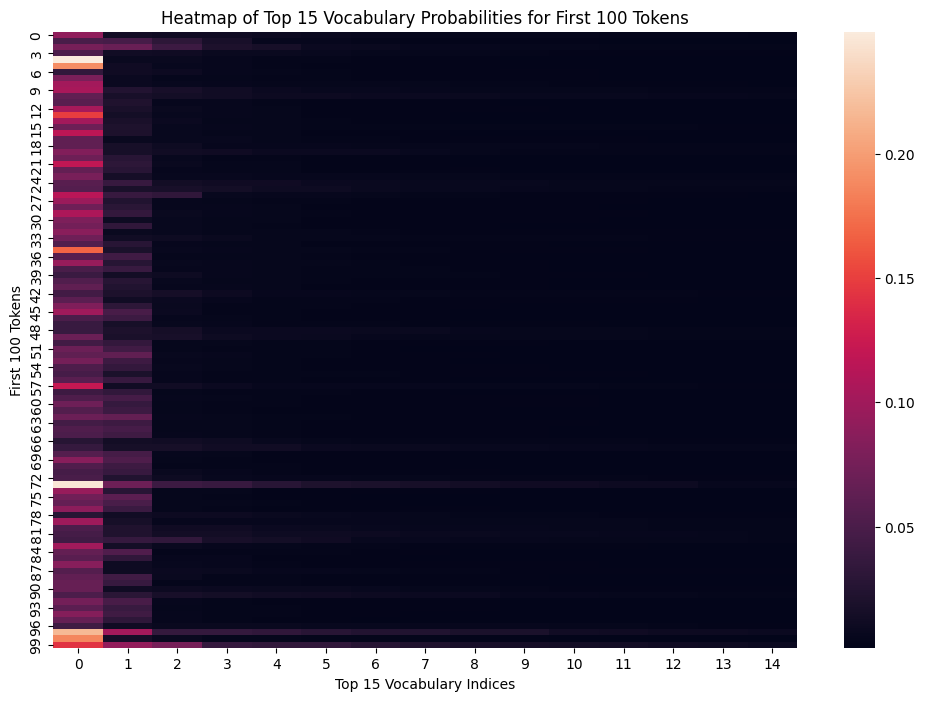

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'output' contains the logits, and they are already squeezed.
# Convert logits to softmax probabilities
TOP_N_PROBS = 15
FIRST_N_TOKENS = 100
probs = F.softmax(output.logits.squeeze(0), dim=-1)

# Step 1: Extract probabilities for the first 100 tokens
probs_first_100_tokens = probs[:FIRST_N_TOKENS, :]  # Shape: [100, 50304]

# Step 2: For each token, select the top 100 probabilities from the 50304 vocabulary options
top_probs, top_indices = torch.topk(probs_first_100_tokens, k=TOP_N_PROBS, dim=-1)

# Step 3: Convert tensors to numpy for plotting
top_probs_np = top_probs.to(torch.float16).detach().cpu().numpy()

# Step 4: Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(top_probs_np, cbar=True)

# Customize the plot with labels and title
plt.title(f'Heatmap of Top {TOP_N_PROBS} Vocabulary Probabilities for First {FIRST_N_TOKENS} Tokens')
plt.xlabel(f'Top {TOP_N_PROBS} Vocabulary Indices')
plt.ylabel(f'First {FIRST_N_TOKENS} Tokens')
plt.show()

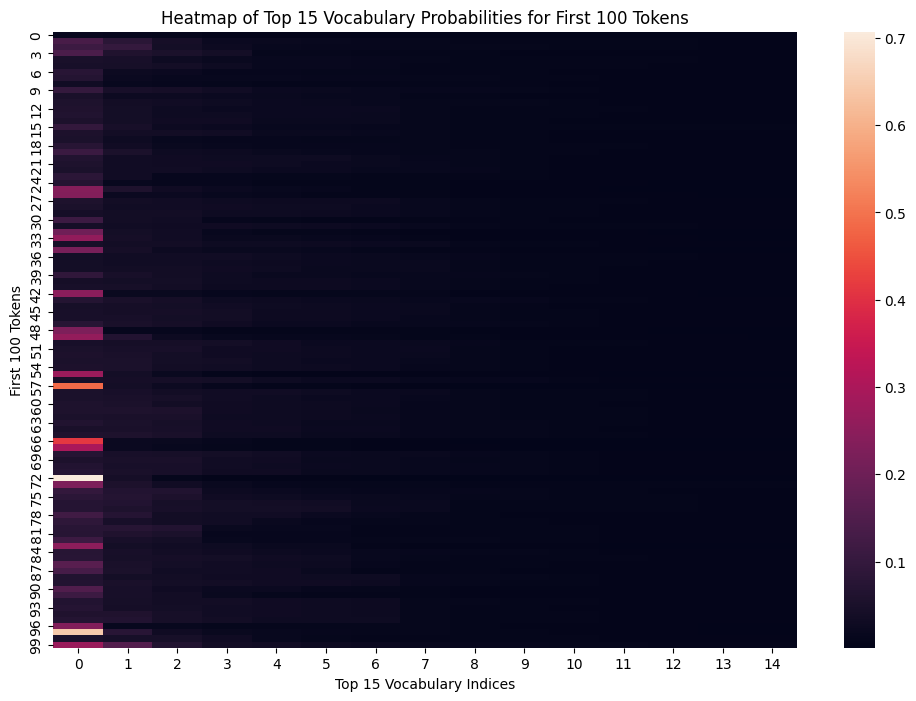

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'output' contains the logits, and they are already squeezed.
# Convert logits to softmax probabilities
TOP_N_PROBS = 15
FIRST_N_TOKENS = 100
probs = F.softmax(output.logits.squeeze(0), dim=-1)

# Step 1: Extract probabilities for the first 100 tokens
probs_first_100_tokens = probs[:FIRST_N_TOKENS, :]  # Shape: [100, 50304]

# Step 2: For each token, select the top 100 probabilities from the 50304 vocabulary options
top_probs, top_indices = torch.topk(probs_first_100_tokens, k=TOP_N_PROBS, dim=-1)

# Step 3: Convert tensors to numpy for plotting
top_probs_np = top_probs.to(torch.float16).detach().cpu().numpy()

# Step 4: Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(top_probs_np, cbar=True)

# Customize the plot with labels and title
plt.title(f'Heatmap of Top {TOP_N_PROBS} Vocabulary Probabilities for First {FIRST_N_TOKENS} Tokens')
plt.xlabel(f'Top {TOP_N_PROBS} Vocabulary Indices')
plt.ylabel(f'First {FIRST_N_TOKENS} Tokens')
plt.show()

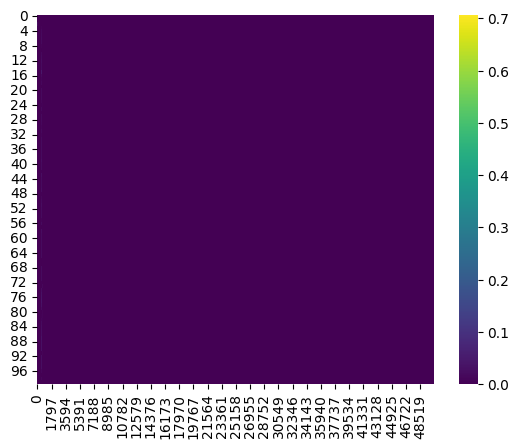

In [ ]:



# Plot the distribution of output logits for the first token 
import matplotlib.pyplot as plt
# plt.hist(probs[0, :].to(torch.float16).detach().cpu().numpy(), bins=10000)
# plt.show()

# Now plot a 2D histogram of the logits. One dimension is the token index, the other is the logit distribution
import seaborn as sns
sns.heatmap(probs[:100, :].to(torch.float16).detach().cpu().numpy(), cmap='viridis')
plt.show()


In [ ]:
input_ids = batch["input_ids"]
decoded_input = tokenizer.decode(input_ids.flatten()).strip()
decoded_labels = tokenizer.decode(batch["labels"].flatten()).strip()
# Ignore special tokens for output
decoded_output = tokenizer.decode(output.logits.argmax(dim=-1).flatten()[new_input_ids.shape[1] :], skip_special_tokens=True).strip()
#print("Decoded Input:", decoded_input)
print("Decoded Output:", decoded_output)

Decoded Output: AYesYesNoNoYesNoYesNothethethethethethethethethethethe room with club clubthethe room room house athethethe with with room with with with room room with with door door door. withthethe withthethethethe doorthethethe with with hair hair hair hair door door door woodenthethe in in hair womanthethethethe are are are in inways women man man...... screenAYes door are in are in areways in with man...... are are and shirt with are in in in are in..Yes man man are shirts in. in in and and are. door. a man are man in in are in. are and and and. in... on. in. in.... are shirt and and and. computer.. w a.. in in. in in are are are. shirts are and with music.. on man with with in on with a in with and shirt are in a computer. man. man a a on man shirt in are in in are music.. a man mat a watch in in with in music musicTTTT people people a athethethethethethe man peoplethethethe people people manthethethethethethethe man man man peoplethethe manthethe man manthethethethe people man 

In [ ]:
from prismatic.models.vlms import PrismaticVLM
with torch.autocast("cuda", dtype=torch.bfloat16):
    # fmt: off
    generated_ids = super(PrismaticVLM, vlm.model).generate(
        input_ids=batch['input_ids'],            # Shape: [1, seq]
        pixel_values=batch["pixel_values"],      # Shape: [1, 3, res, res] or Dict[str, Shape[1, 3, res, res]]
        #attention_mask=batch["attention_mask"],
        do_sample = True,
        temperature = 1.0,
        max_new_tokens = 512,
        min_length = 10
    )
    # fmt: on

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


In [ ]:
generated_text = tokenizer.decode(generated_ids[0, new_input_ids.shape[1] :]).strip()
print(generated_text)

ANT: No<|endoftext|>USER: Is the man smiling? ASSISTANT: Yes<|endoftext|>USER: Is this man writing? ASSISTANT: No<|endoftext|>USER: Who seems more happier? ASSISTANT: Men<|endoftext|>USER: How many people in this photo appear to be holding gaming controllers? ASSISTANT: 2<|endoftext|>USER: What is on the man's wrist? ASSISTANT: Watch<|endoftext|>USER: What is in the guys hand? ASSISTANT: Wii remote<|endoftext|>USER: Are they inside? ASSISTANT: Yes<|endoftext|>USER: What color is his hair? ASSISTANT: Gray<|endoftext|>USER: What part of this man's outfit is missing? ASSISTANT: Shirt<|endoftext|>USER: Is this a test waiting room? ASSISTANT: No<|endoftext|>USER: Is the man wearing a tie? ASSISTANT: No<|endoftext|>USER: What is the person in white t-shirt holding? ASSISTANT: Wii remote<|endoftext|>USER: What kind of electronic device is the man using? ASSISTANT: Wii<|endoftext|>USER: Is anyone else in the room with the man? ASSISTANT: Yes<|endoftext|>USER: What color is the old man's shirt?

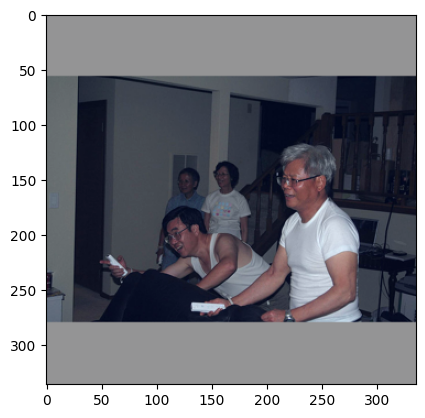

<|endoftext|>A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions. USER: Is this person alone?
Answer the question using a single word or phrase. ASSISTANT: No<|endoftext|>USER: Is the man smiling? ASSISTANT: Yes<|endoftext|>USER: Is this man writing? ASSISTANT: No<|endoftext|>USER: Who seems more happier? ASSISTANT: Men<|endoftext|>USER: How many people in this photo appear to be holding gaming controllers? ASSISTANT: 2<|endoftext|>USER: What is on the man's wrist? ASSISTANT: Watch<|endoftext|>USER: What is in the guys hand? ASSISTANT: Wii remote<|endoftext|>USER: Are they inside? ASSISTANT: Yes<|endoftext|>USER: What color is his hair? ASSISTANT: Gray<|endoftext|>USER: What part of this man's outfit is missing? ASSISTANT: Shirt<|endoftext|>USER: Is this a test waiting room? ASSISTANT: No<|endoftext|>USER: Is the man wearing a tie? ASSISTANT: No<|endoftext|>USER: What is the person in 

In [ ]:
# Plot the pixelvalues in batch["pixel_values"]
import matplotlib.pyplot as plt
import numpy as np
# Scale image by min max normalizing to 0-255 then plot
pixel_values = batch["pixel_values"]
pixel_values = pixel_values.squeeze(0).permute(1, 2, 0).cpu().numpy()
pixel_values = (pixel_values - pixel_values.min()) / (pixel_values.max() - pixel_values.min()) * 255
plt.imshow(pixel_values.astype(np.uint8))
plt.show()

print(decoded_input)

In [ ]:
print(decoded_output)


up up up

<|endoftext|><|endoftext|><|endoftext|> up<|endoftext|>



<|endoftext|>
<|endoftext|><|endoftext|><|endoftext|>


<|endoftext|><|endoftext|><|endoftext|><|endoftext|>


<|endoftext|>
<|endoftext|><|endoftext|>
<|endoftext|>


<|endoftext|>

<|endoftext|><|endoftext|><|endoftext|>
<|endoftext|><|endoftext|> up<|endoftext|><|endoftext|>



<|endoftext|><|endoftext|><|endoftext|>
<|endoftext|>


<|endoftext|>
<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|> of



<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>
<|endoftext|><|endoftext|><|endoftext|>
<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>
<|endoftext|><|endoftext|><|endoftext|><|endoftext|> of<|endoftext|>
 party party room with
 with<|endoftext|>
<|endoftext|>
 with house room party house
 party<|endoftext|> party<|endoftext|> with room with house
 of


 with withroomroomroom with house house with with with with wal